# IowaHousingPricePrediction

## Import packages:

In [343]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

### General setting:

In [344]:
#Show all columns, rows, width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Some useful functions:

In [345]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

## Read & Inspect data

In [346]:
train_df = pd.read_csv('./data/train.csv', index_col = 0)
test_df = pd.read_csv('./data/test.csv', index_col = 0)

In [347]:
train_df.shape

(1460, 80)

In [348]:
test_df.shape

(1459, 79)

In [349]:
train_df.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
613,60,RL,NaN,11885,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,108.0,Gd,TA,PConc,Gd,TA,Av,GLQ,990,Unf,0,309,1299,GasA,Ex,Y,SBrkr,1299,573,0,1872,1,0,2,1,3,1,Ex,7,Typ,1,TA,BuiltIn,2001.0,RFn,2,531,TA,TA,Y,160,122,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,261500
1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,366.0,Gd,TA,PConc,Gd,Gd,No,GLQ,976,Unf,0,868,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,1,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,620,TA,TA,Y,165,44,0,0,0,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000
1367,60,RL,68.0,9179,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,158.0,Gd,TA,PConc,Gd,TA,No,GLQ,633,Unf,0,240,873,GasA,Ex,Y,SBrkr,882,908,0,1790,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1999.0,RFn,2,588,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,193000
1165,80,RL,NaN,16157,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,SLvl,5,7,1978,1978,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Gd,ALQ,680,Rec,391,289,1360,GasA,Ex,Y,SBrkr,1432,0,0,1432,1,0,1,1,2,1,Gd,5,Typ,1,TA,Attchd,1978.0,Unf,2,588,TA,TA,Y,168,180,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,194000
12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
701,20,RL,85.0,14331,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,630.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1274,Unf,0,526,1800,GasA,Ex,Y,SBrkr,1800,0,0,1800,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,3,765,TA,TA,Y,270,78,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,312500


## Missing value analysis:

In [350]:
# Missing number in column:
train_mask = train_df.isnull().sum()
train_mask[train_mask>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Missing value data frame inspection:

In [351]:
missing_row = train_df.columns[train_df.isnull().sum(axis=0)!=0]
# Return the rows with missing values:
train_df[train_df.isnull().any(axis=1)].sample(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,360,Unf,0,360,720,GasA,TA,Y,SBrkr,854,0,528,1382,0,0,1,1,2,1,TA,7,Typ,0,NaN,Detchd,1991.0,Unf,2,660,TA,TA,Y,237,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,194,Unf,0,638,832,GasA,TA,Y,SBrkr,832,832,0,1664,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1976.0,RFn,2,528,TA,TA,Y,0,28,0,0,259,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900
1068,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,2Story,6,6,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkFace,360.0,TA,TA,CBlock,TA,TA,Gd,GLQ,674,LwQ,106,0,780,GasA,TA,Y,SBrkr,798,813,0,1611,1,0,1,1,4,1,TA,7,Typ,0,NaN,Attchd,1964.0,RFn,2,442,TA,TA,Y,328,128,0,0,189,0,NaN,NaN,NaN,0,6,2008,WD,Normal,167900
1081,20,RL,80.0,11040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1971,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,Gd,CBlock,TA,TA,No,ALQ,656,Unf,0,602,1258,GasA,Ex,Y,SBrkr,1258,0,0,1258,0,1,2,0,3,1,Gd,5,Typ,0,NaN,Attchd,1971.0,RFn,2,528,TA,TA,Y,55,0,0,216,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,145000


#### Data missingness types:
- Missing Completely at Random (MCAR)
- Missing at Random (MAR)
- Missing Not at Random (MNAR)

#### Data missingness imputation methods:
- Mean Value Imputation
- Simple Random Imputation
- Regression Prediction

In [352]:
missing_col = train_df.columns[train_df.isnull().sum()!=0]
missing_col

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [353]:
train_df[missing_col].sample(5)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,,,,
318,75.0,NaN,None,0.0,Gd,TA,Av,Unf,Unf,SBrkr,Gd,Attchd,2006.0,RFn,TA,TA,NaN,NaN,NaN
510,80.0,NaN,BrkFace,132.0,TA,TA,No,ALQ,Unf,SBrkr,NaN,Attchd,1959.0,RFn,TA,TA,NaN,MnPrv,NaN
579,34.0,Pave,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Detchd,2007.0,Unf,TA,TA,NaN,NaN,NaN
200,76.0,NaN,BrkFace,262.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,Fin,TA,TA,NaN,NaN,NaN
987,59.0,NaN,None,0.0,TA,Fa,No,Unf,Unf,SBrkr,NaN,Attchd,1950.0,Unf,Fa,TA,NaN,NaN,NaN


#### Missing column analysis: ####

- '***' means variable need to furthur investigate
----------------------------------------------------------------------------
##### ***LotFrontage: Linear feet of street connected to property
- MCAR, however it is linearly relate to LotArea, use regression to impute
- missing number: 259
- Impute method: impute by groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

----------------------------------------------------------------------------
##### ***Alley: Type of ally access to property
- MNAR, NA means No alley access which means it has value to it. Can be convert to categorized
- missing number: 1369
- Impute method: impute with mode

----------------------------------------------------------------------------
##### ***MasVnrType: Masonry veneer type
- MCAR, can use other most common type to impute
- missing number: 8
- Impute method: impute with mode

----------------------------------------------------------------------------
##### ***MasVnrArea: Masonry veneer area in square feet
- MCAR, it is correlate to size of house and MasVnrType
- missing number: 8
- Impute method: impute with 0

----------------------------------------------------------------------------
##### BsmtQual: Evaluates the height of the basement
- MNAR, if NA no basement, categorical, ordinal
- missing number: 37
- Impute method: None

----------------------------------------------------------------------------
##### BsmtCond: Evaluates the general condition of the basement
- MNAR, if NA no basement, categorical, ordinal
- missing number: 37
- Impute method: None

----------------------------------------------------------------------------
##### ***BsmtExposure: Refers to walkout or garden level walls
- MNAR, if NA no basement, categorical, ordinal
- missing number: 38, need to investigate, maybe one of it is MACR.
- Impute method: None

----------------------------------------------------------------------------
##### BsmtFinType1: Rating of basement finished area
- MNAR, if NA no basement, categorical, ordinal
- missing number: 37
- Impute method: None

----------------------------------------------------------------------------
##### ***BsmtFinType2: Rating of basement finished area (if multiple types)
- MNAR, if NA no basement, categorical, ordinal
- missing number: 38, maybe it is relate to BsmtExposure
- Impute method: None

----------------------------------------------------------------------------
##### ***Electrical: Electrical system
- MCAR, simple random imputation
- missing number: 1
- Impute method: fillna(all_data['Electrical'].mode()[0]

----------------------------------------------------------------------------
##### FireplaceQu: Fireplace quality
- MNAR, NA means no fireplace
- missing number: 690
- Impute method: None

----------------------------------------------------------------------------
##### GarageType: 
- MNAR, NA means no garage
- missing number: 81
- Impute method: None

----------------------------------------------------------------------------
##### GarageYrBlt: Year garage was built
- MNAR, NA means no garage
- missing number: 81
- Impute method: None

----------------------------------------------------------------------------
##### GarageFinish: Interior finish of the garage
- MNAR, NA means no garage
- missing number: 81
- Impute method: None

----------------------------------------------------------------------------
#### GarageQual: Garage quality
- MNAR, NA means no garage
- missing number: 81
- Impute method: None

----------------------------------------------------------------------------
##### GarageCond: Garage condition
- MNAR, NA means no garage
- missing number: 81
- Impute method: None

----------------------------------------------------------------------------
##### PoolQC: Pool quality
- MNAR, NA means no pool, consider drop since it has too many missing number.
- missing number: 1453
- Impute method: None

----------------------------------------------------------------------------
#### Fence: Fence quality
- MNAR, NA means no fence
- missing number: 1179
- Impute method: None

----------------------------------------------------------------------------
##### MiscFeature: Miscellaneous feature not covered in other categories
- MNAR, NA means no other feature, consider drop since it has too many missing number and category is hard does not have much relationship between each other.
- missing number: 140
- Impute method: None


### Categorical data value count:

In [354]:
numeric_cols = train_df.select_dtypes(['number']).columns
cols = train_df.columns
bools = []
for col in cols:
    if col in numeric_cols:
        bools.append(False)
    else:
        bools.append(True)
categorical_col = cols[bools]
category_values(train_df,categorical_col)


 MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Nulls:  0

 Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Nulls:  0

 Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
Nulls:  1369

 LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Nulls:  0

 LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Nulls:  0

 Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Nulls:  0

 LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Nulls:  0

 LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Nulls:  0

 Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timb

### Categorical col vs price data visualization:

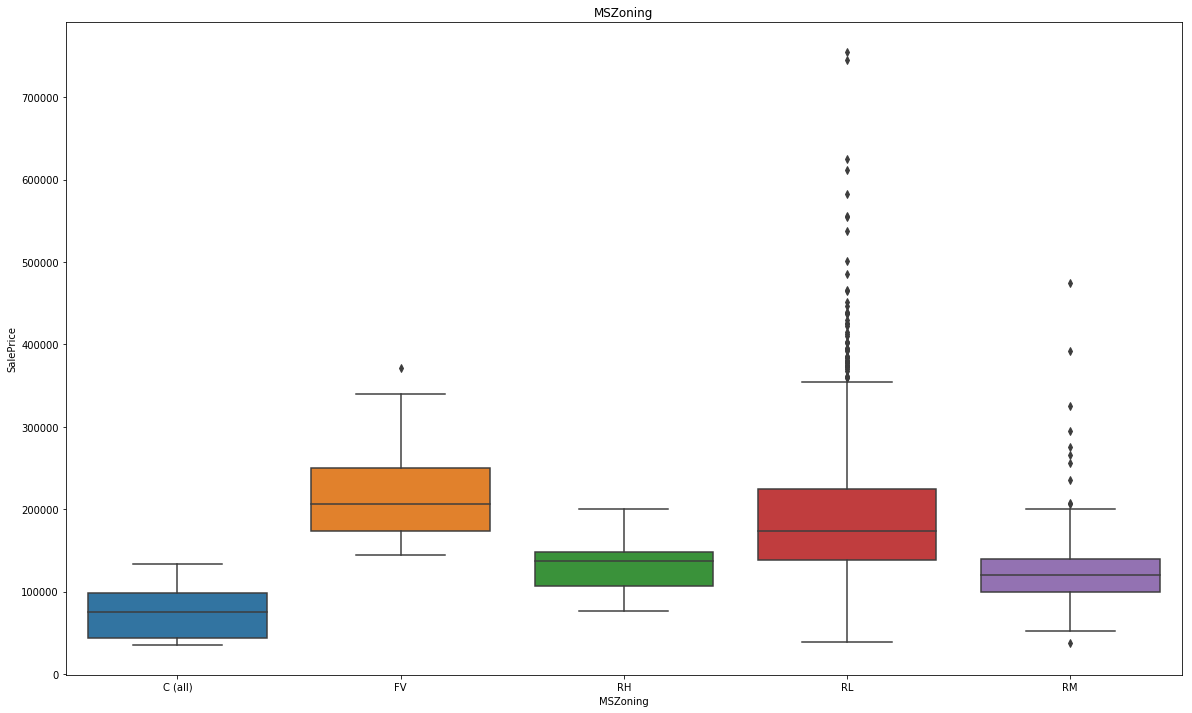

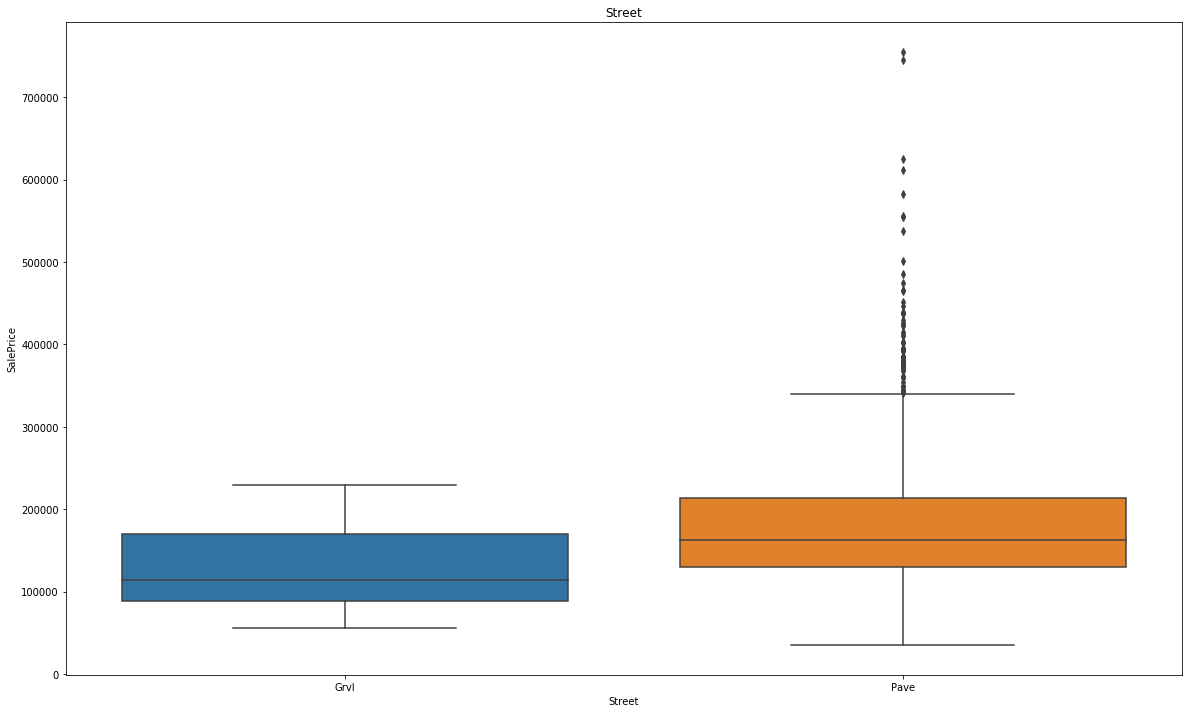

TypeError: '<' not supported between instances of 'str' and 'float'

<Figure size 1440x864 with 0 Axes>

In [355]:
for col in categorical_col:
    fig = plt.figure(figsize= (20,12))
    sns.boxplot(x=train_df[col], y = train_df['SalePrice'],order = sorted(train_df[col].unique())).set_title(col)
    plt.show()

### Numerical data hist:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229223DEBE0>,
      dtype=object)

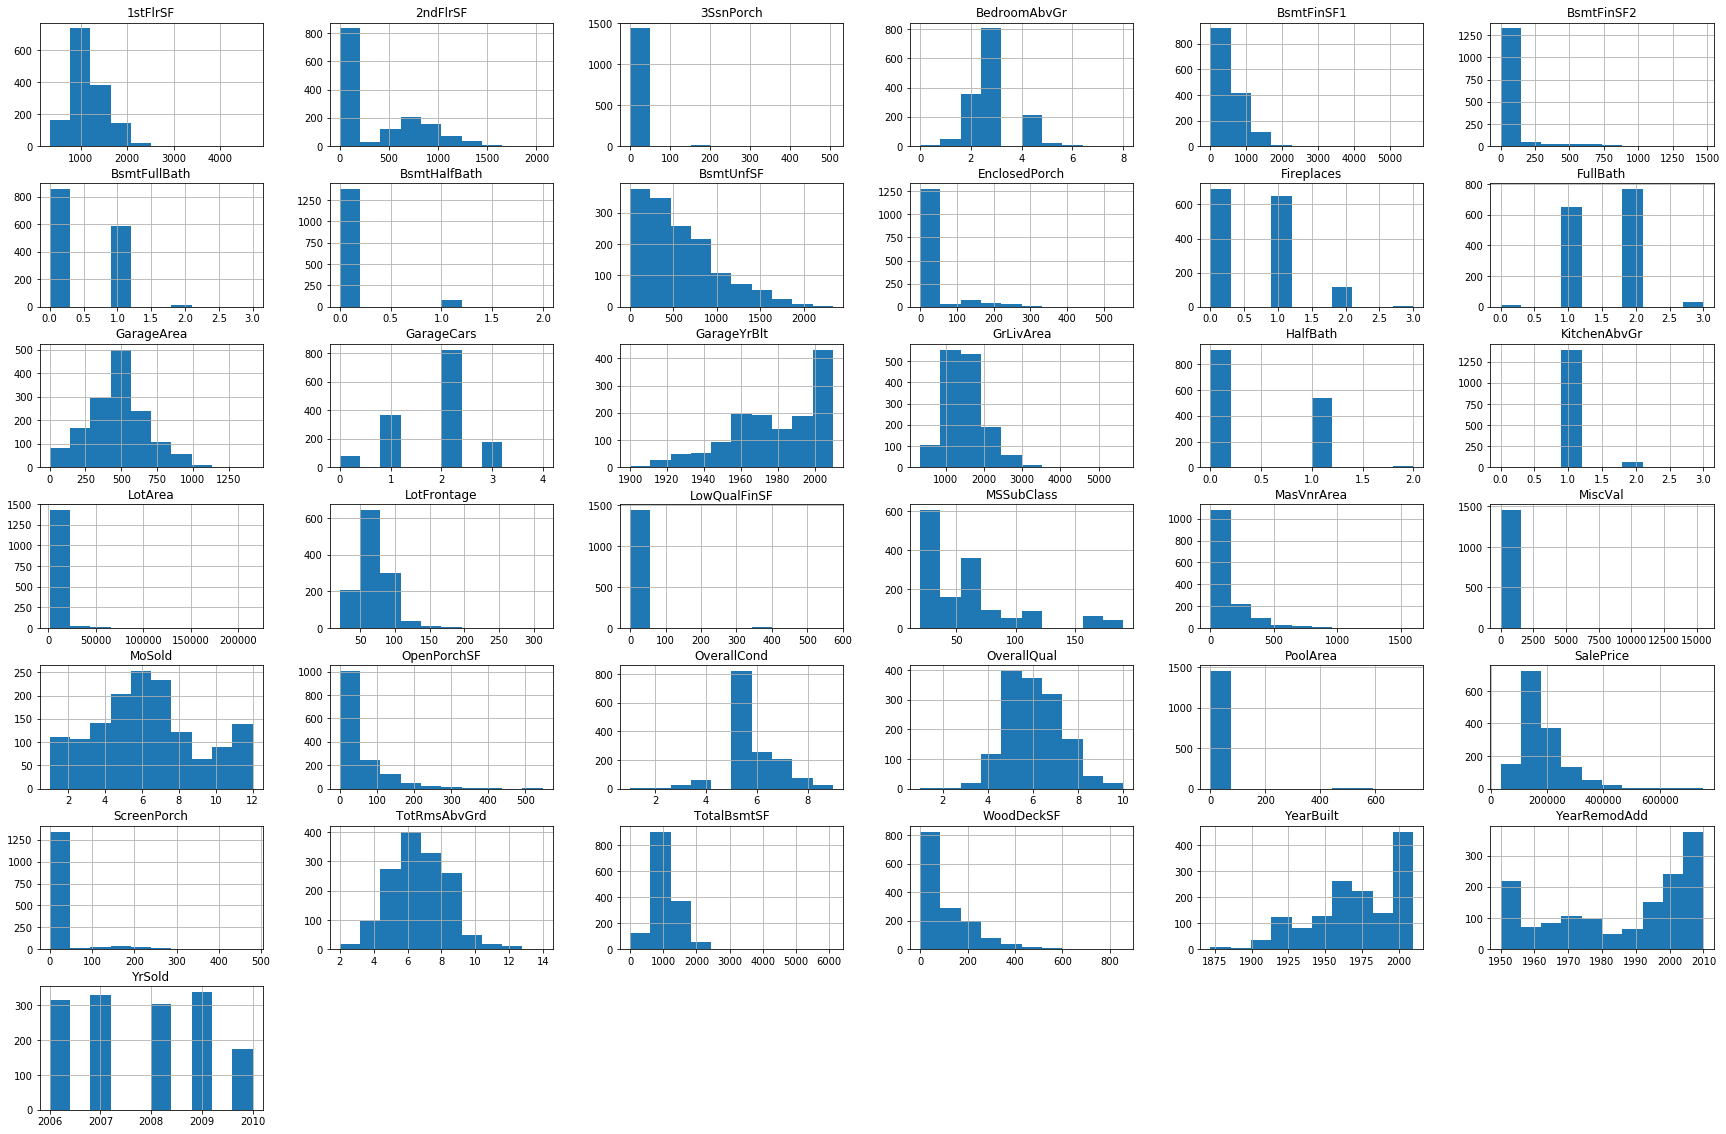

In [356]:
train_df.hist(figsize=(30,20))

### Outliers:

Defining function to plot Target against every input variable

In [357]:
cont_col = ['LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
          'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
          'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
           'MoSold','SalePrice']

In [358]:
numeric_cols = train_df.select_dtypes(['number']).columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [359]:
# creating a dataframe of continous variables

cont_df = train_df[[ 'LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                   'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                   'MoSold','SalePrice']]

In [360]:
def find_outliers(feature, target):
    fig, ax = plt.subplots()
    ax.scatter(x = feature, y = target)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature.name, fontsize=13)
    plt.show()

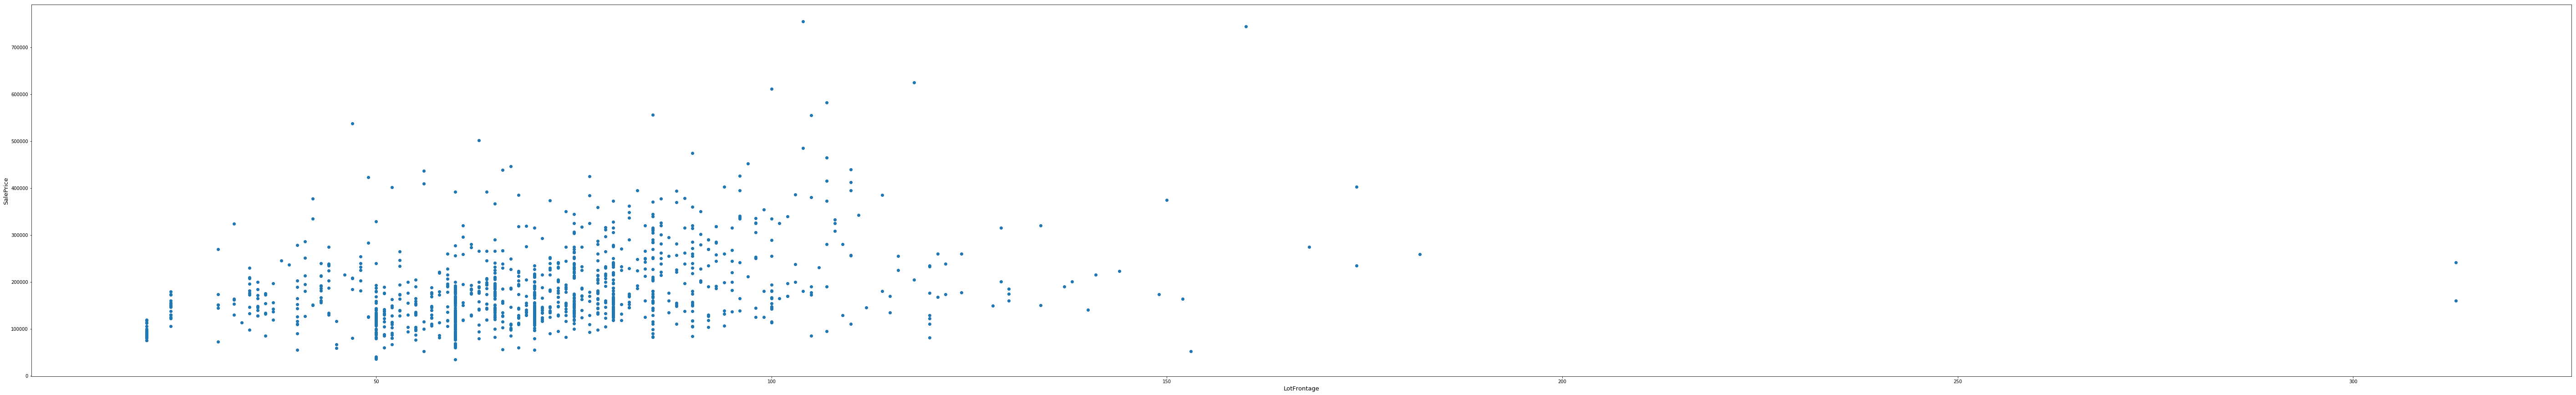

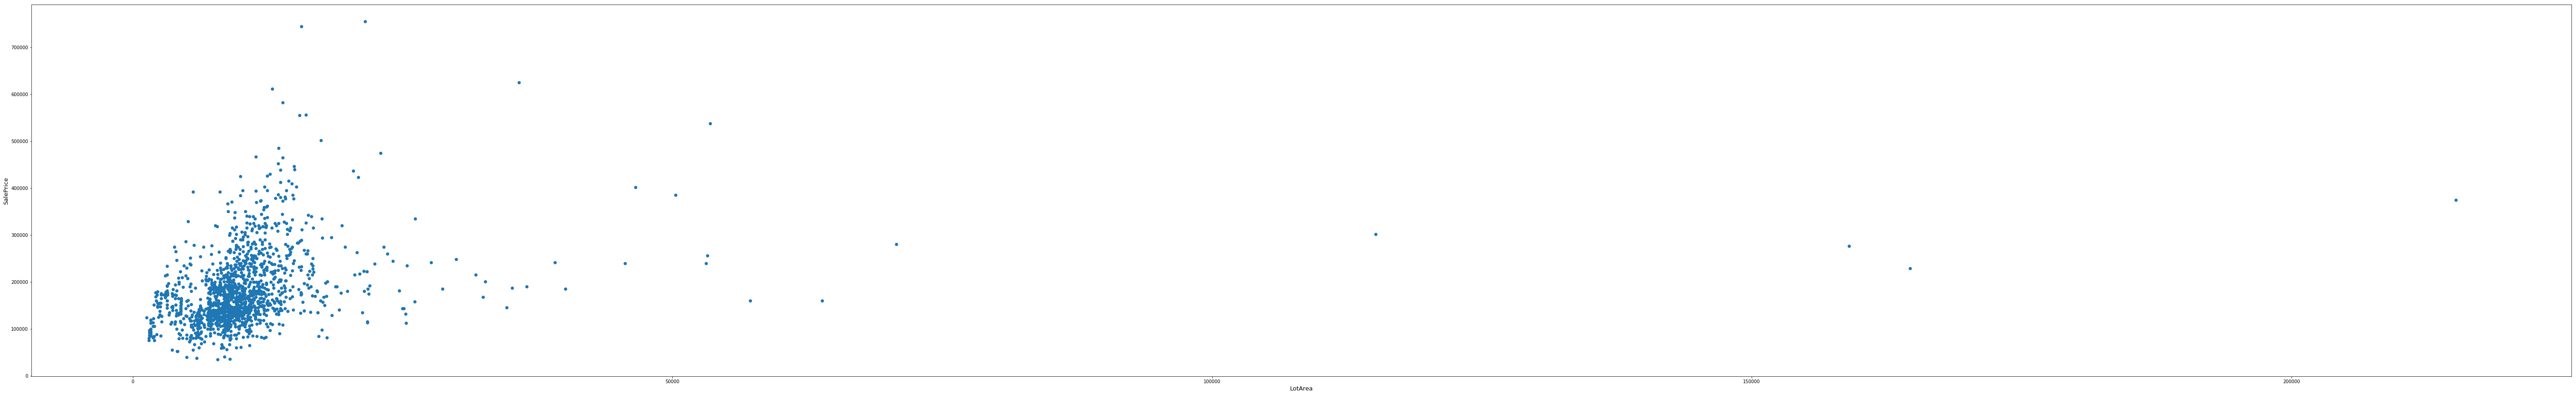

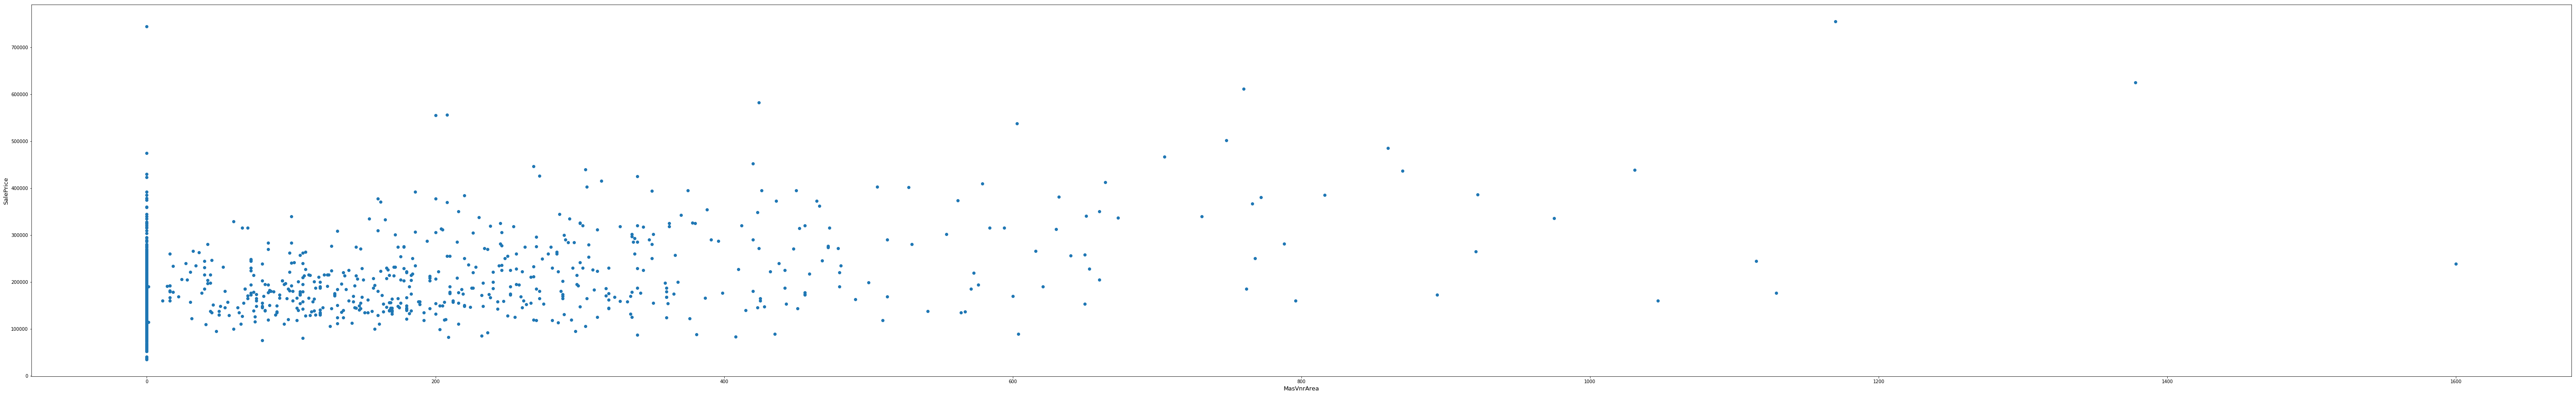

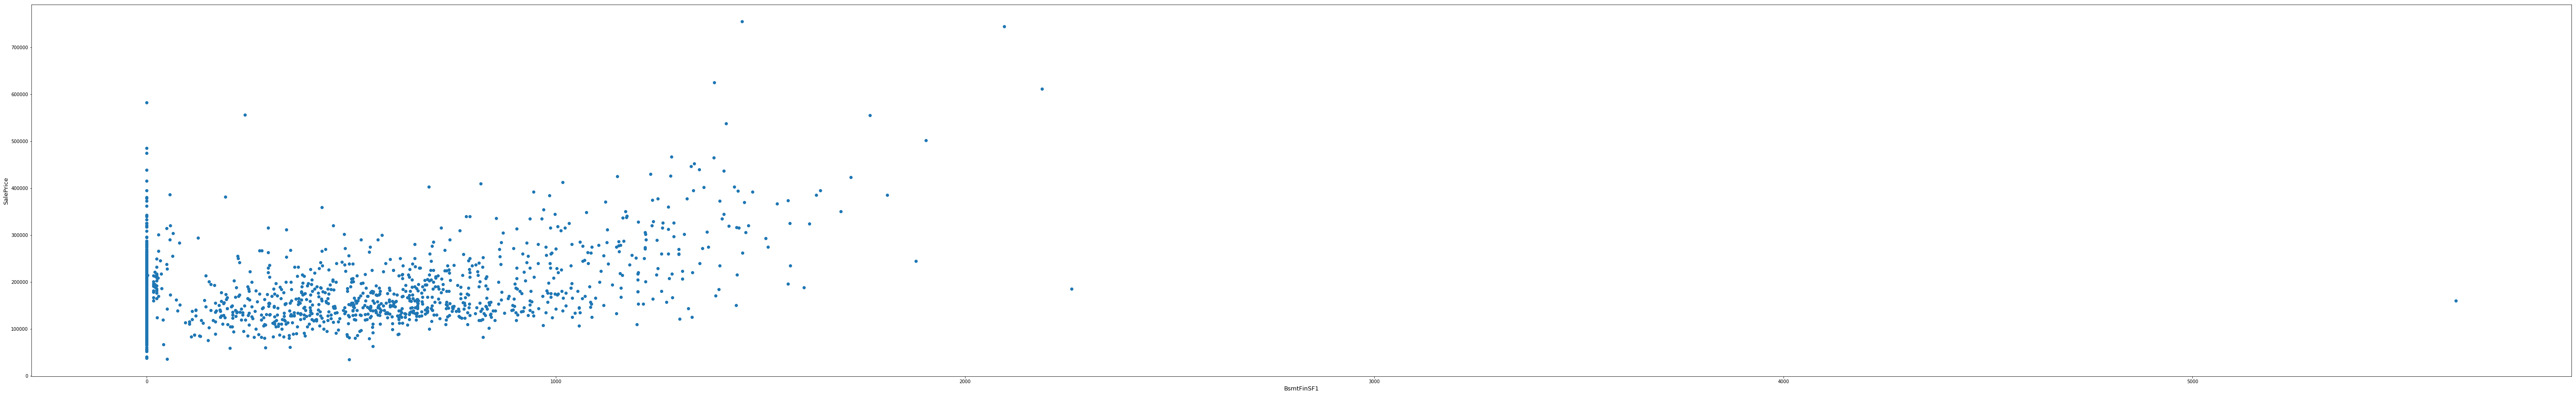

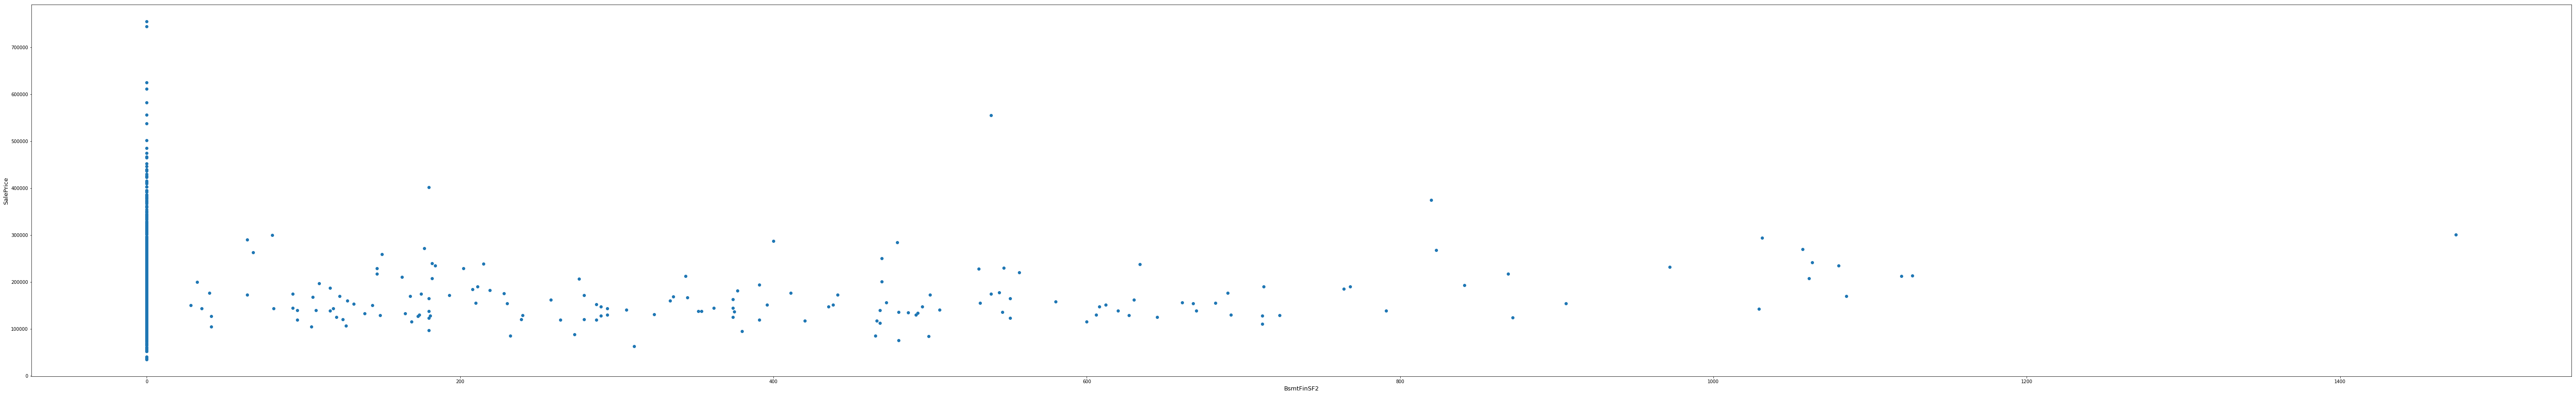

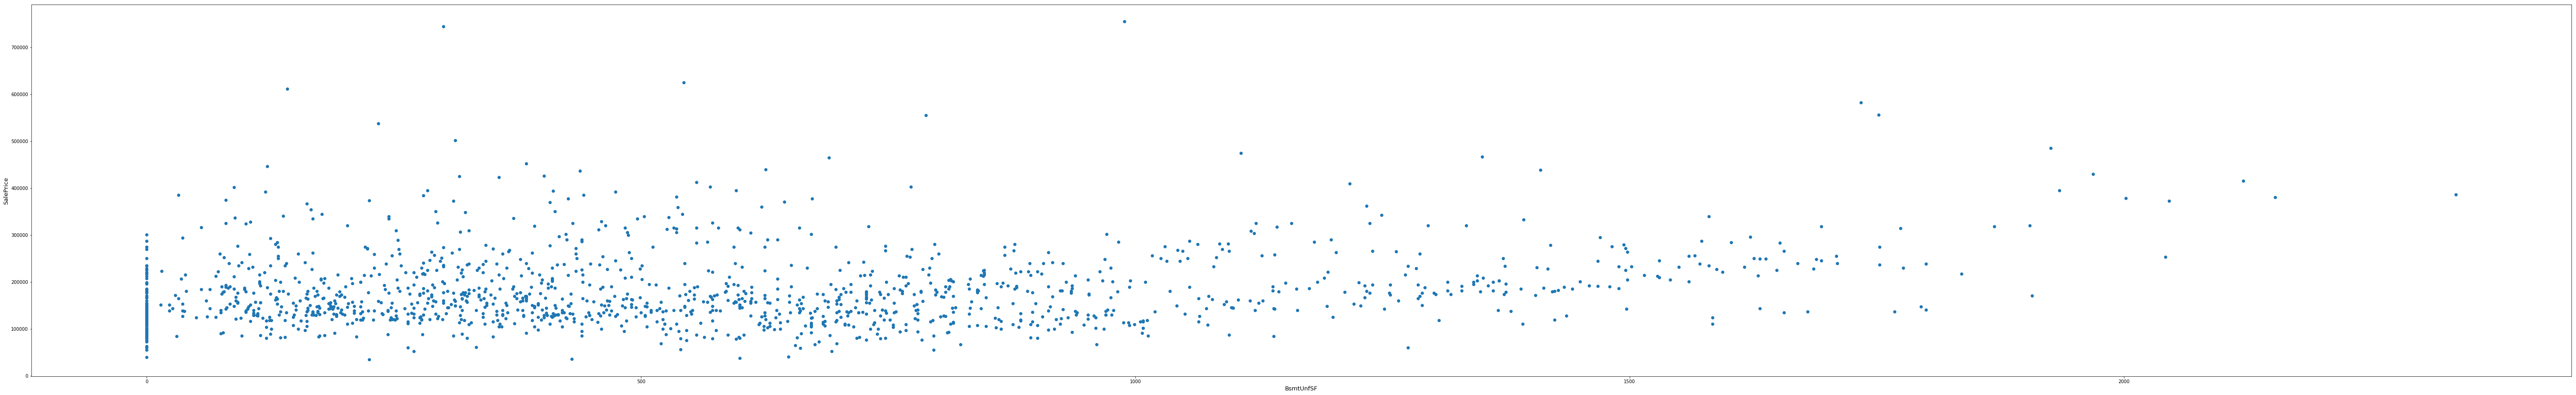

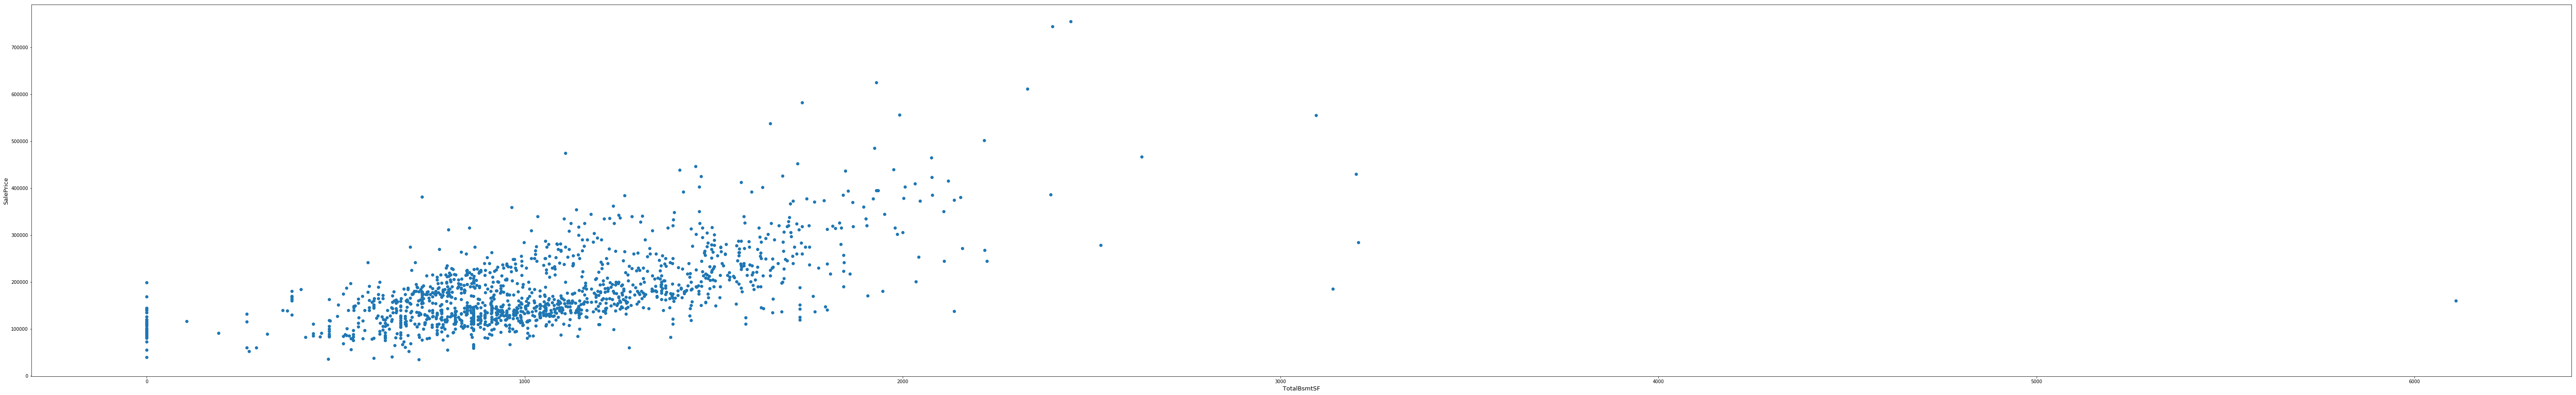

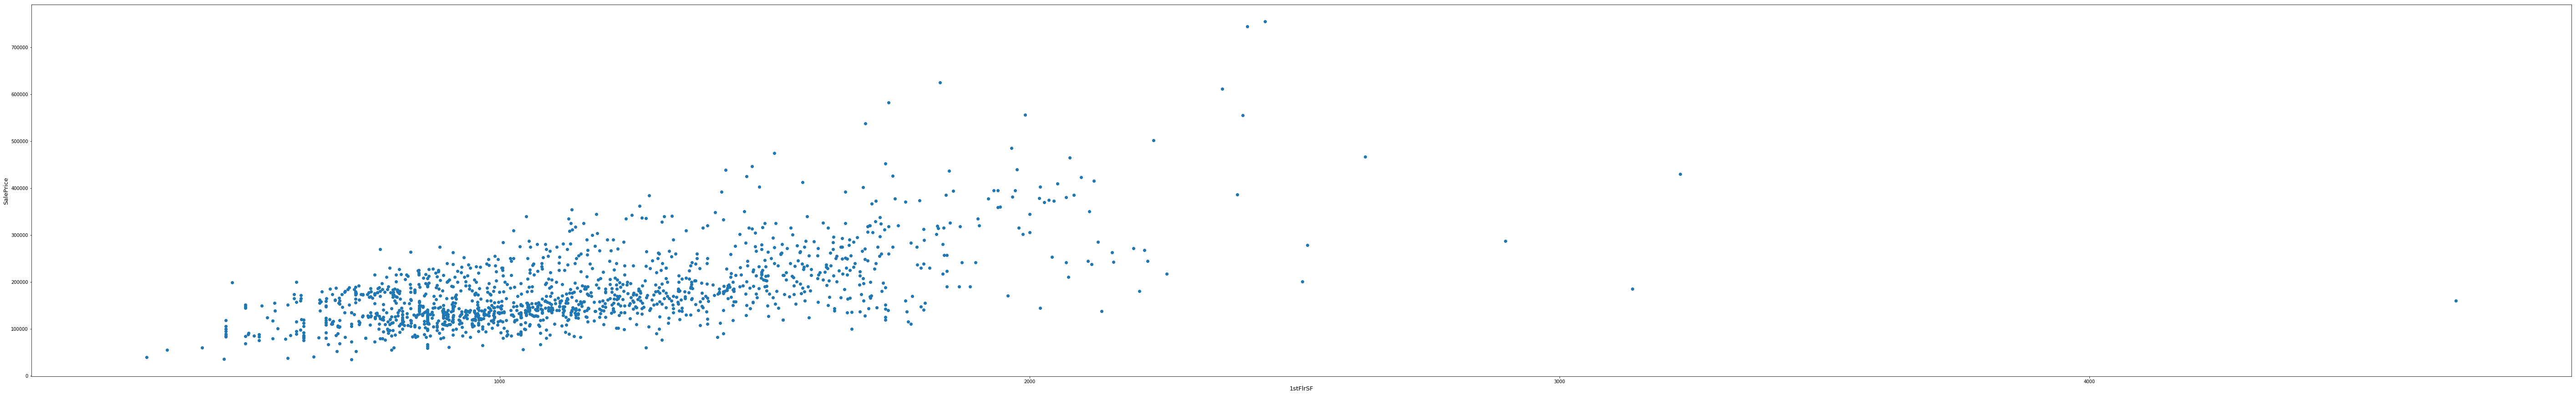

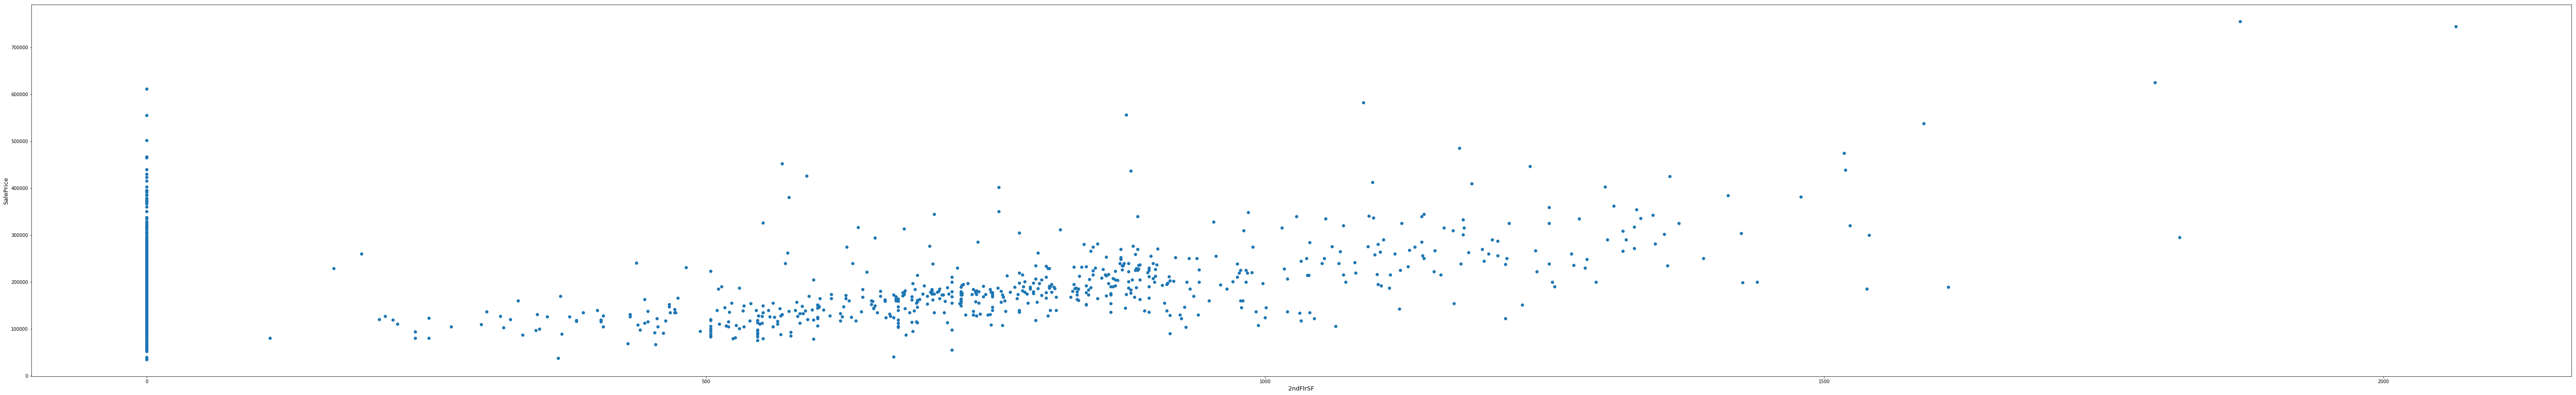

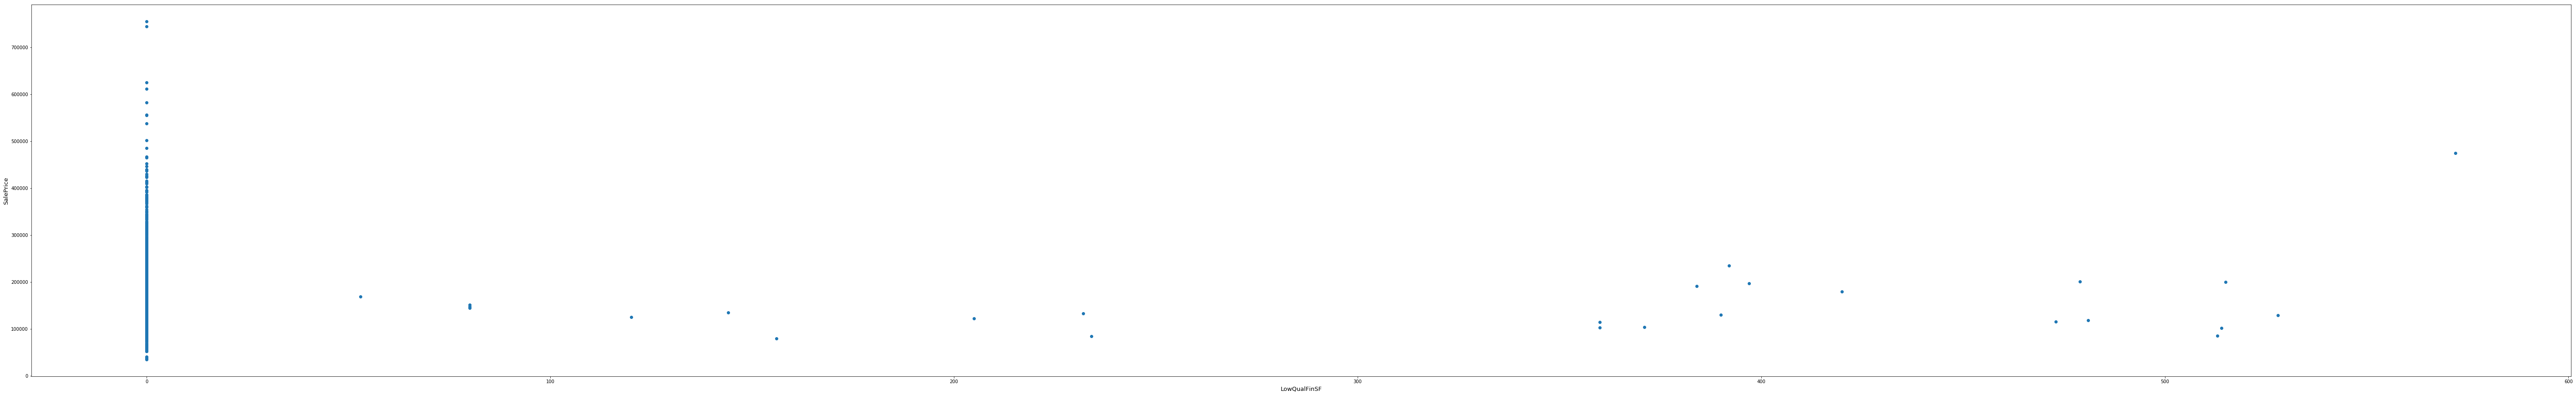

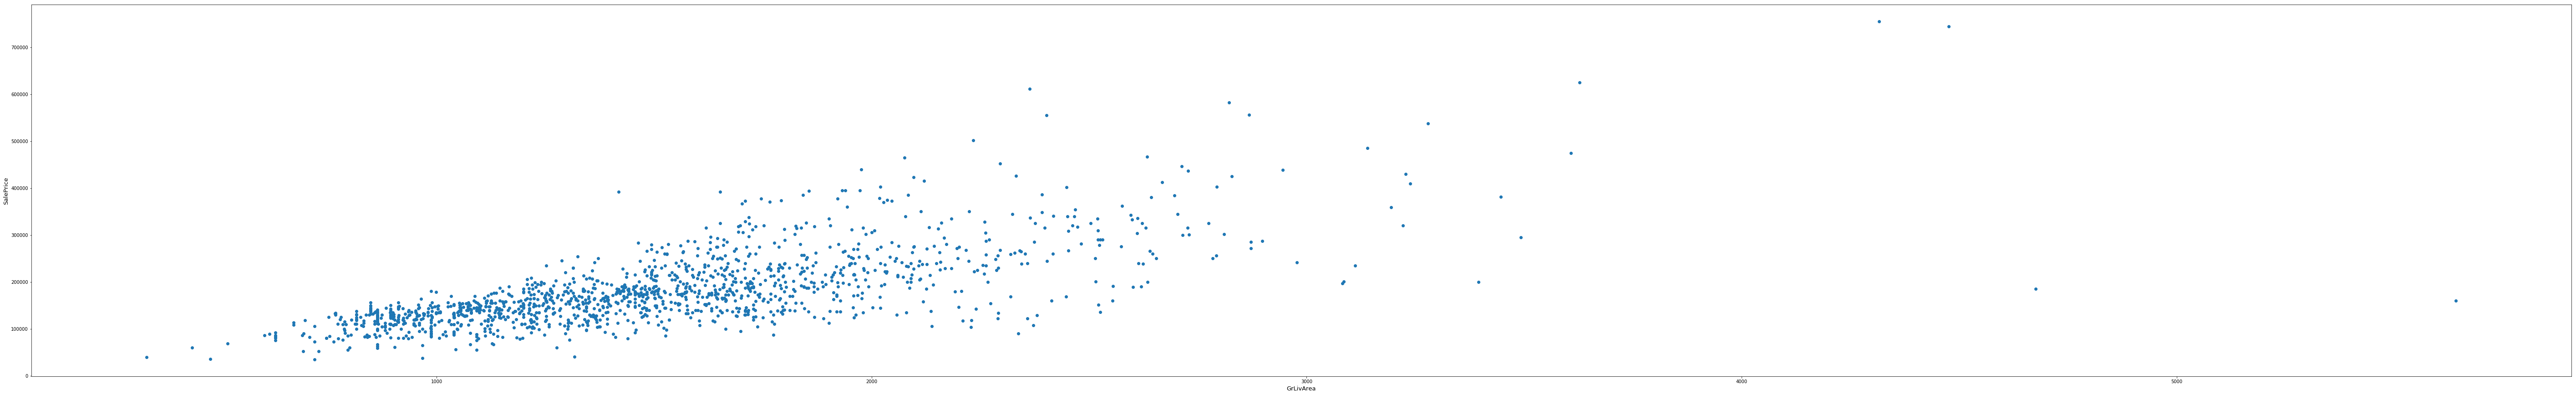

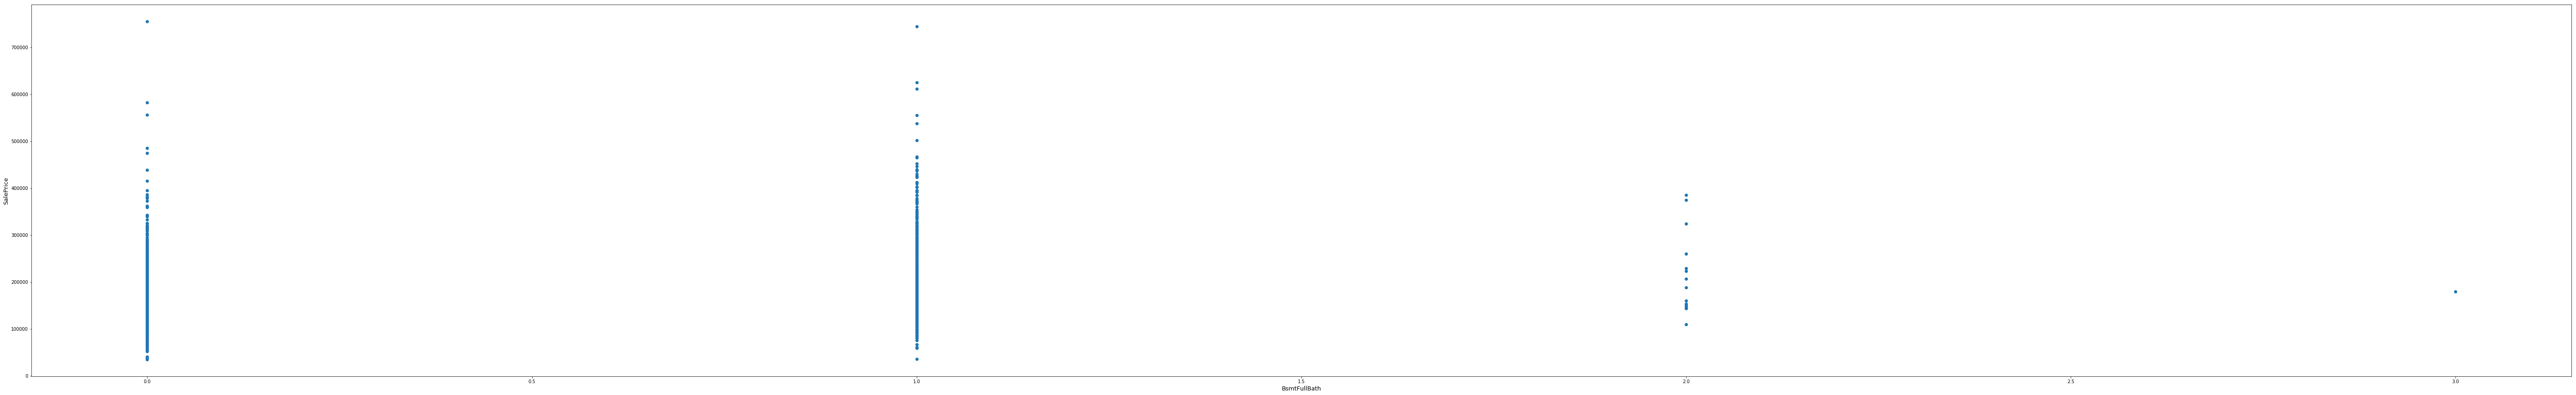

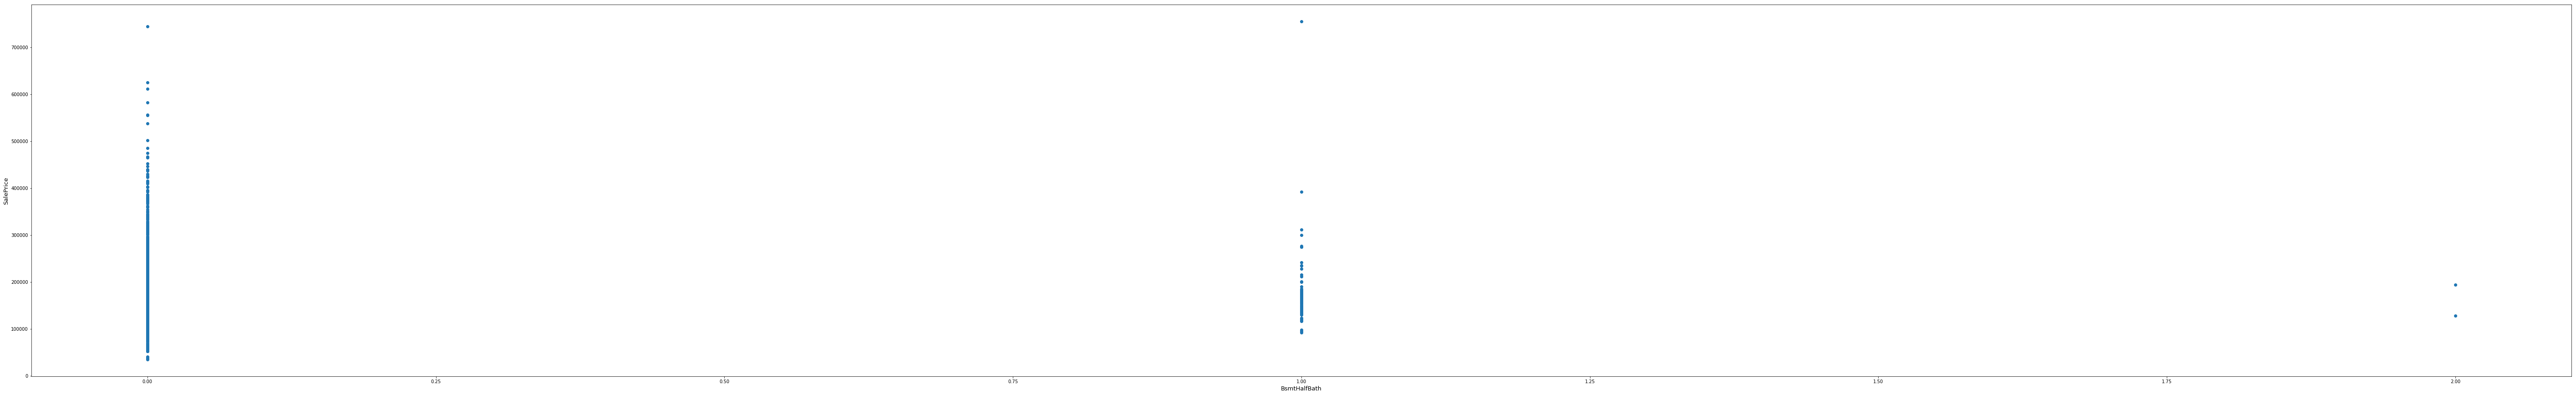

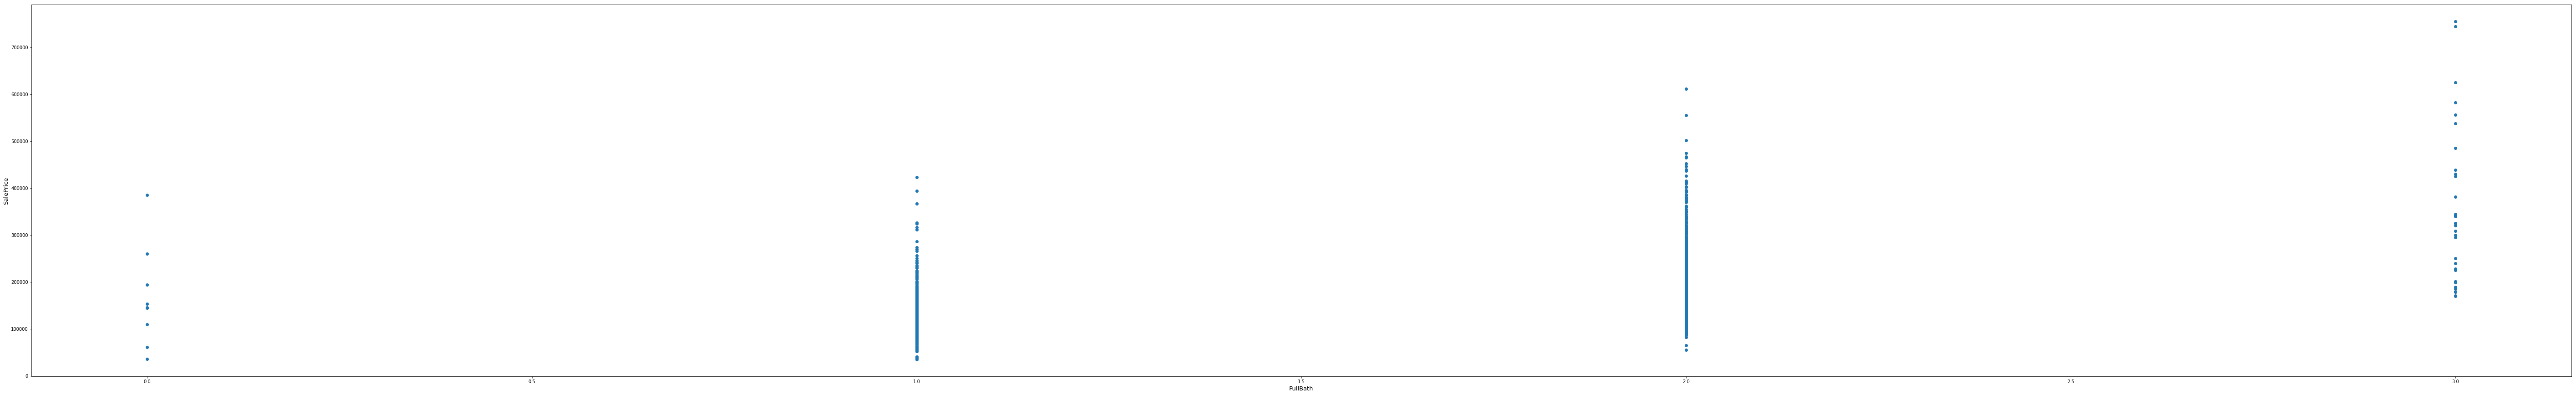

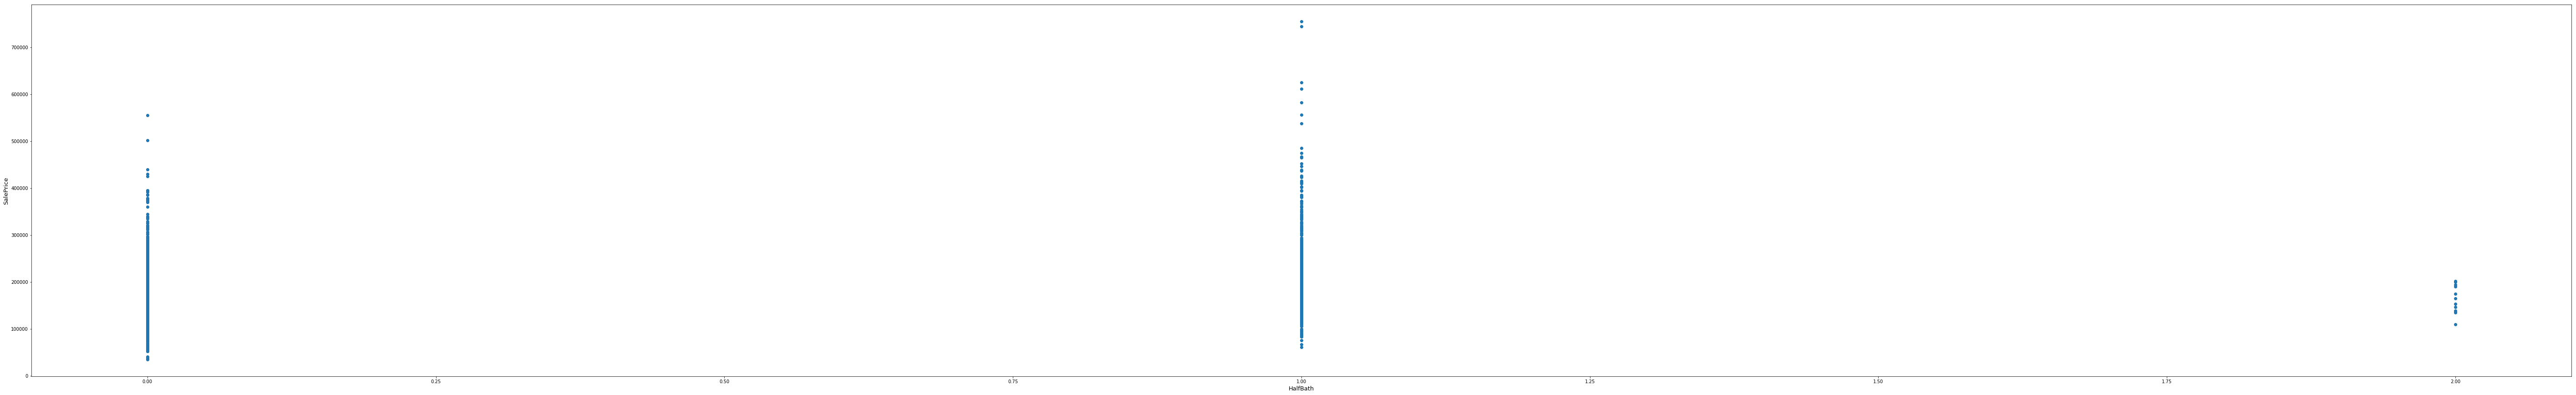

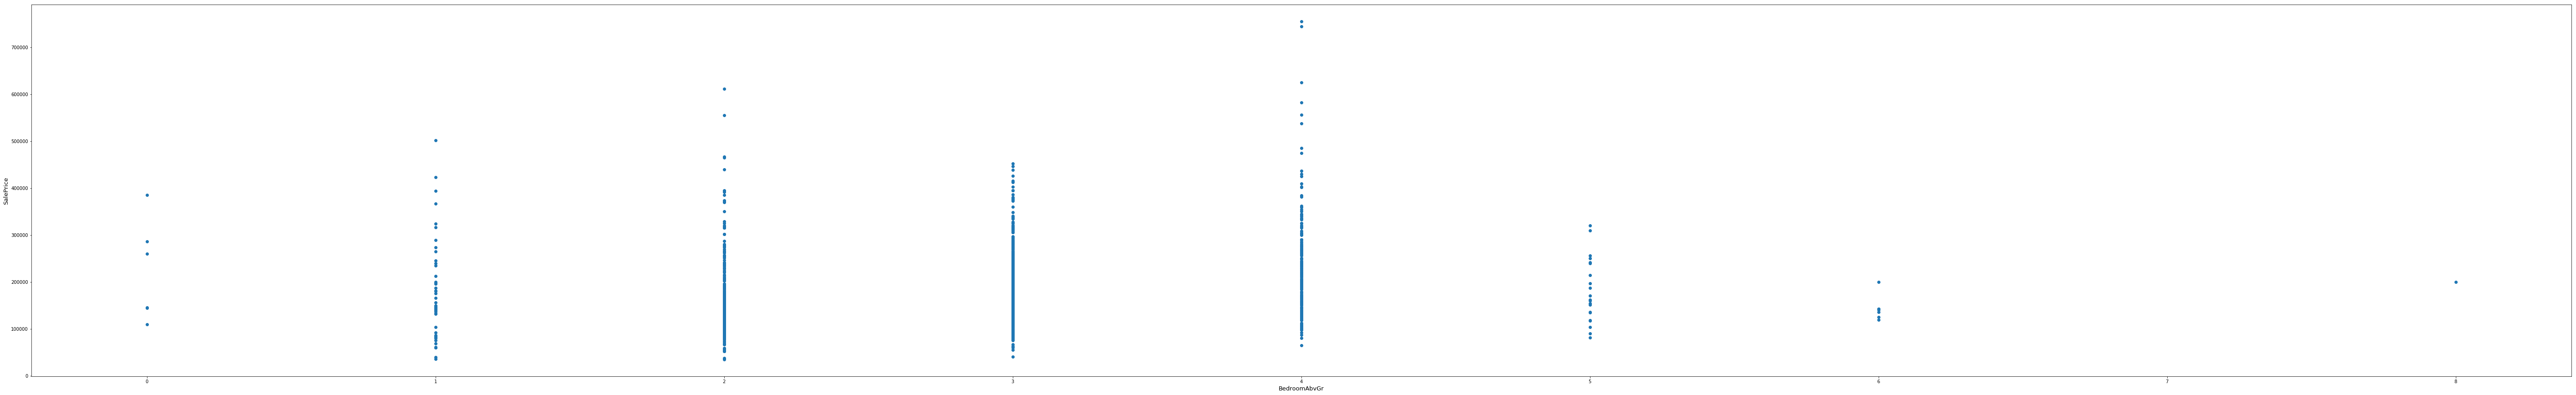

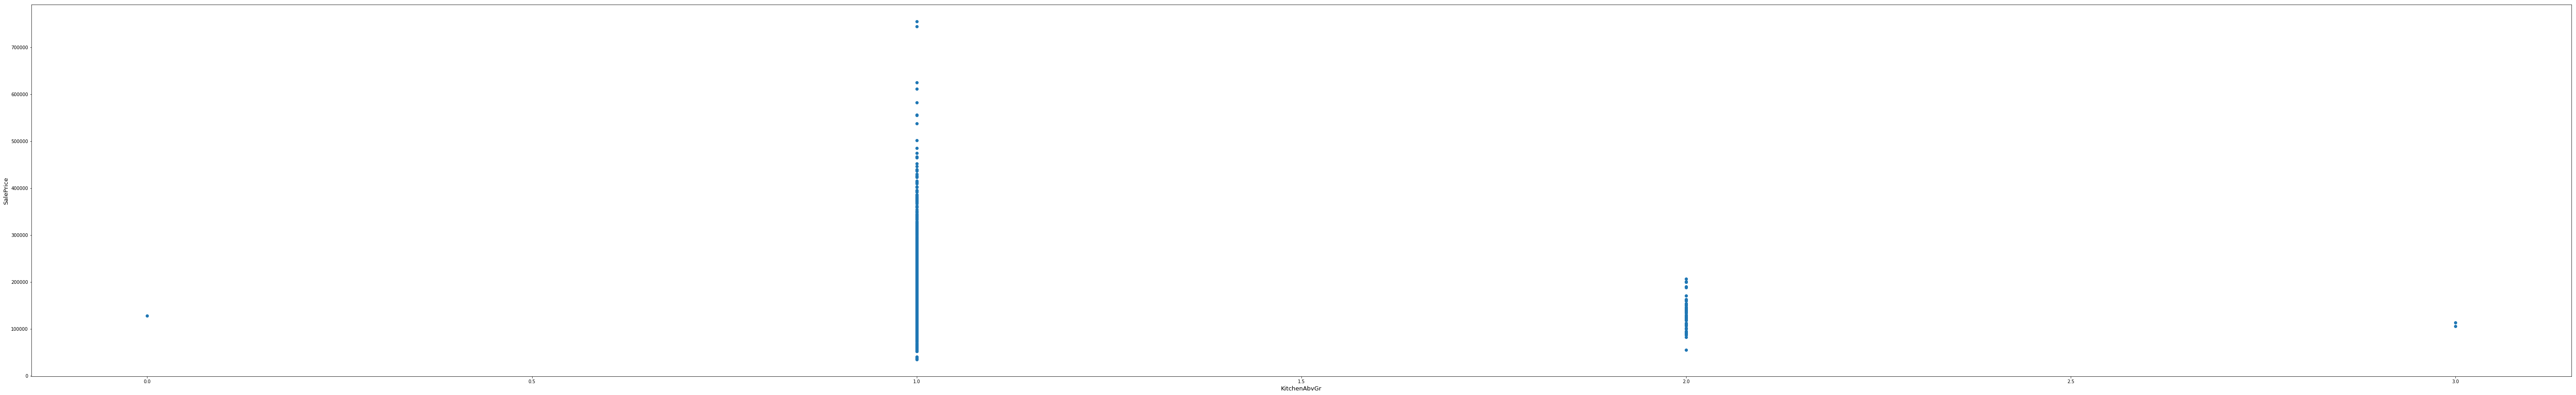

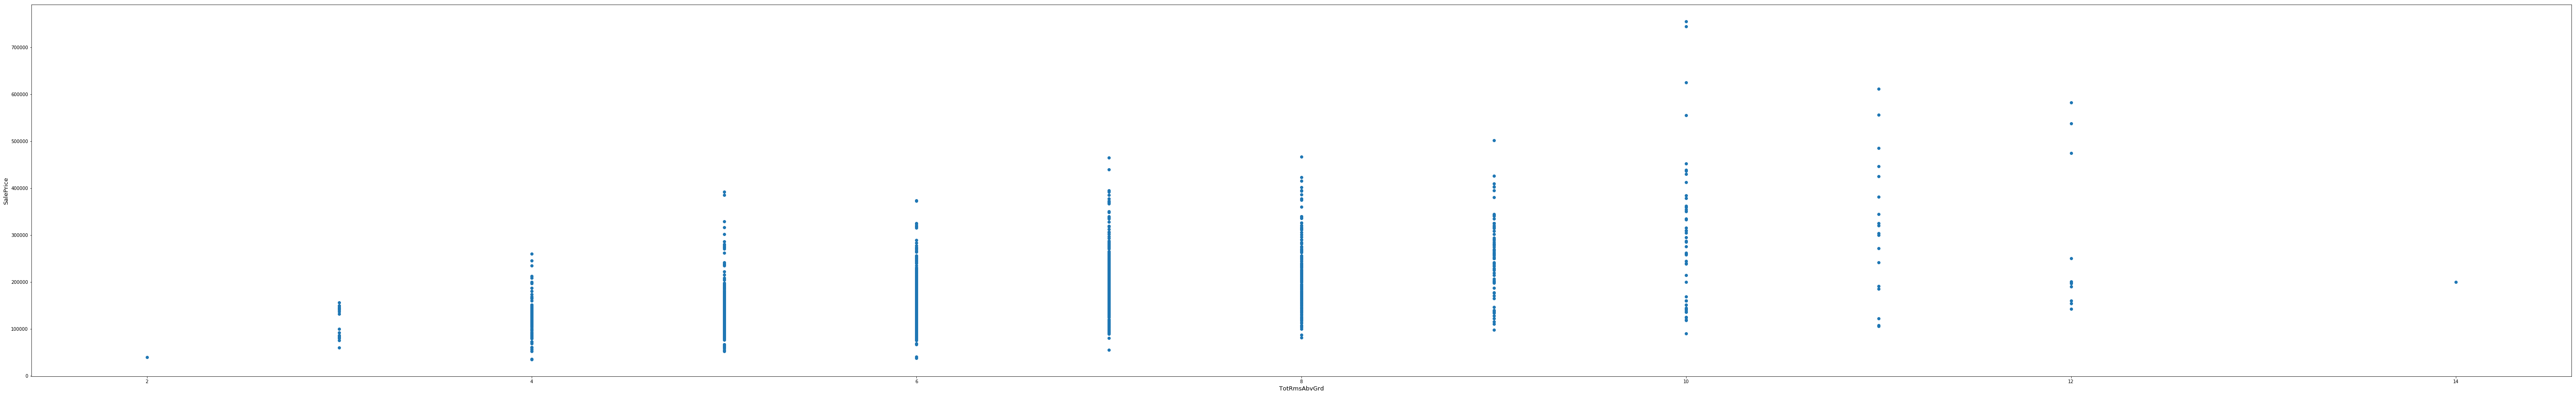

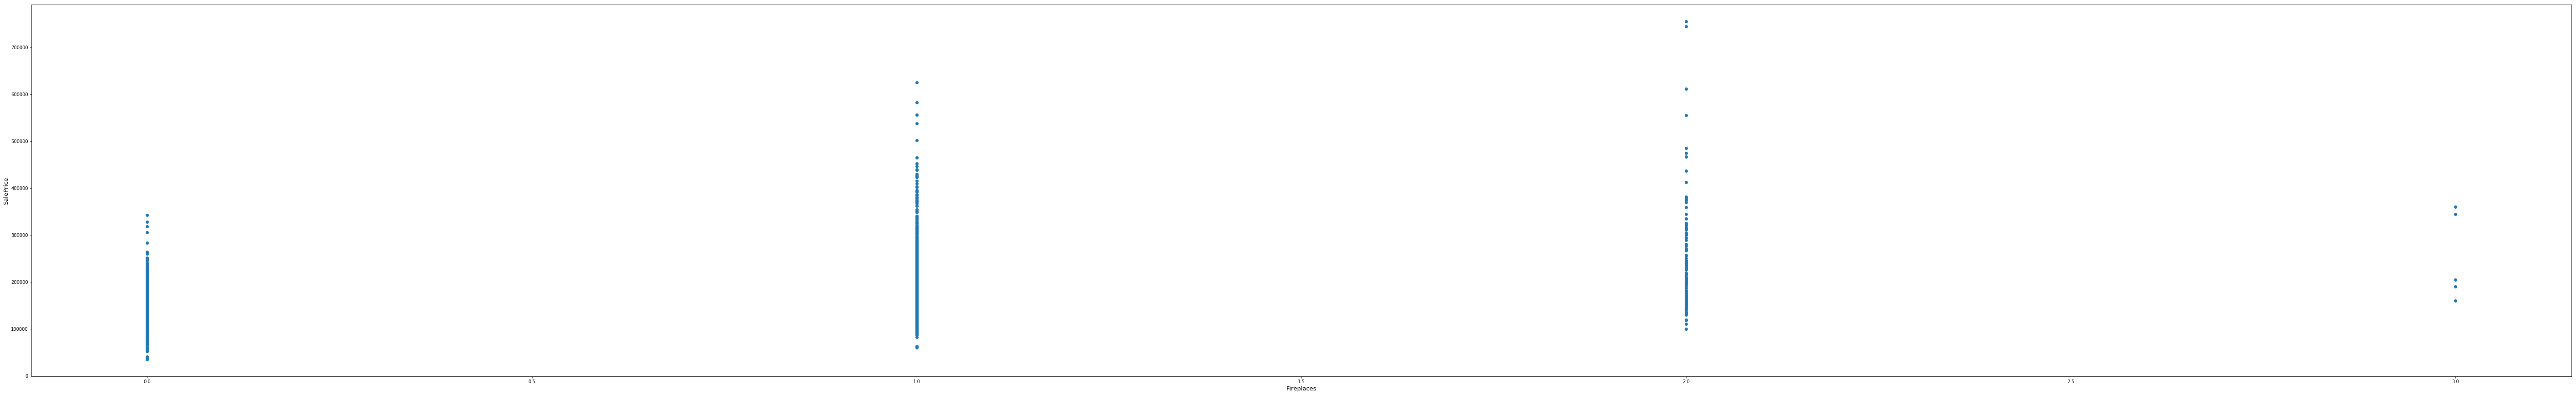

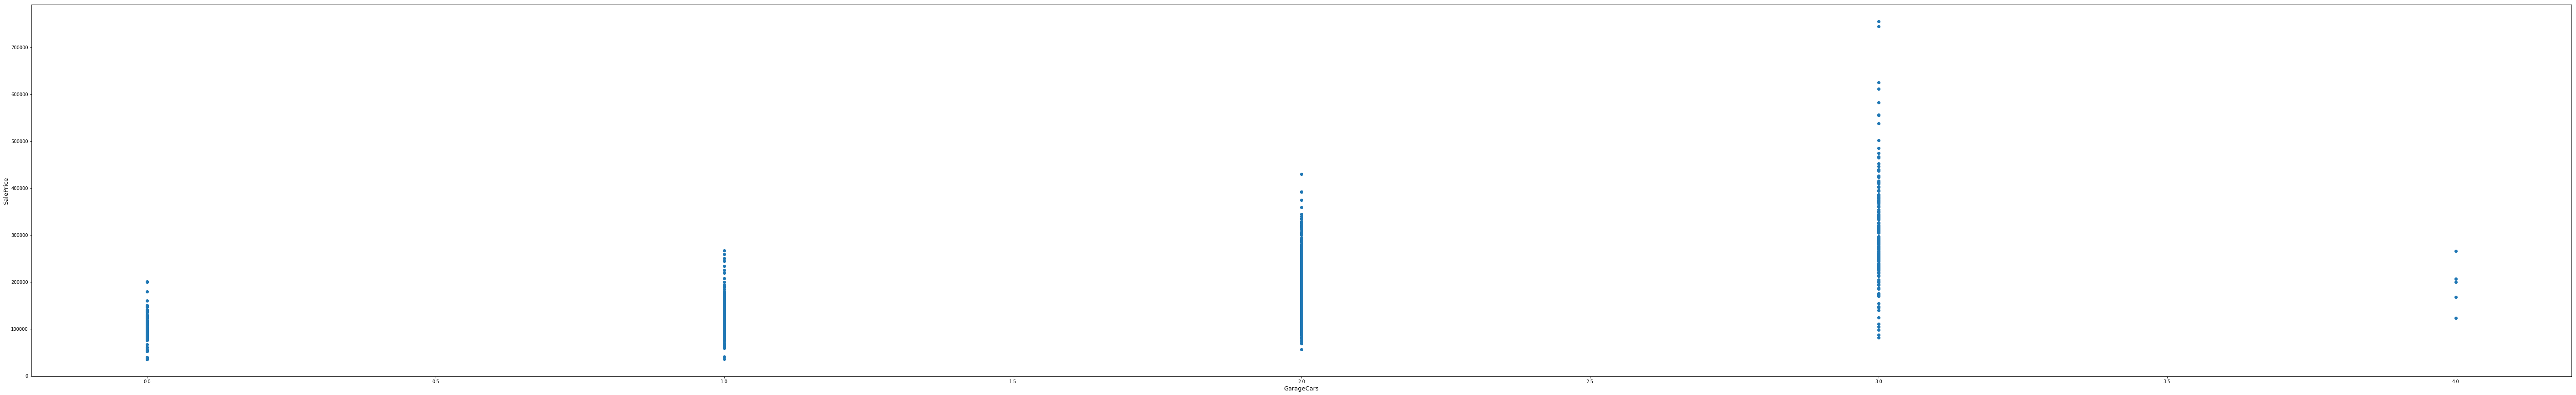

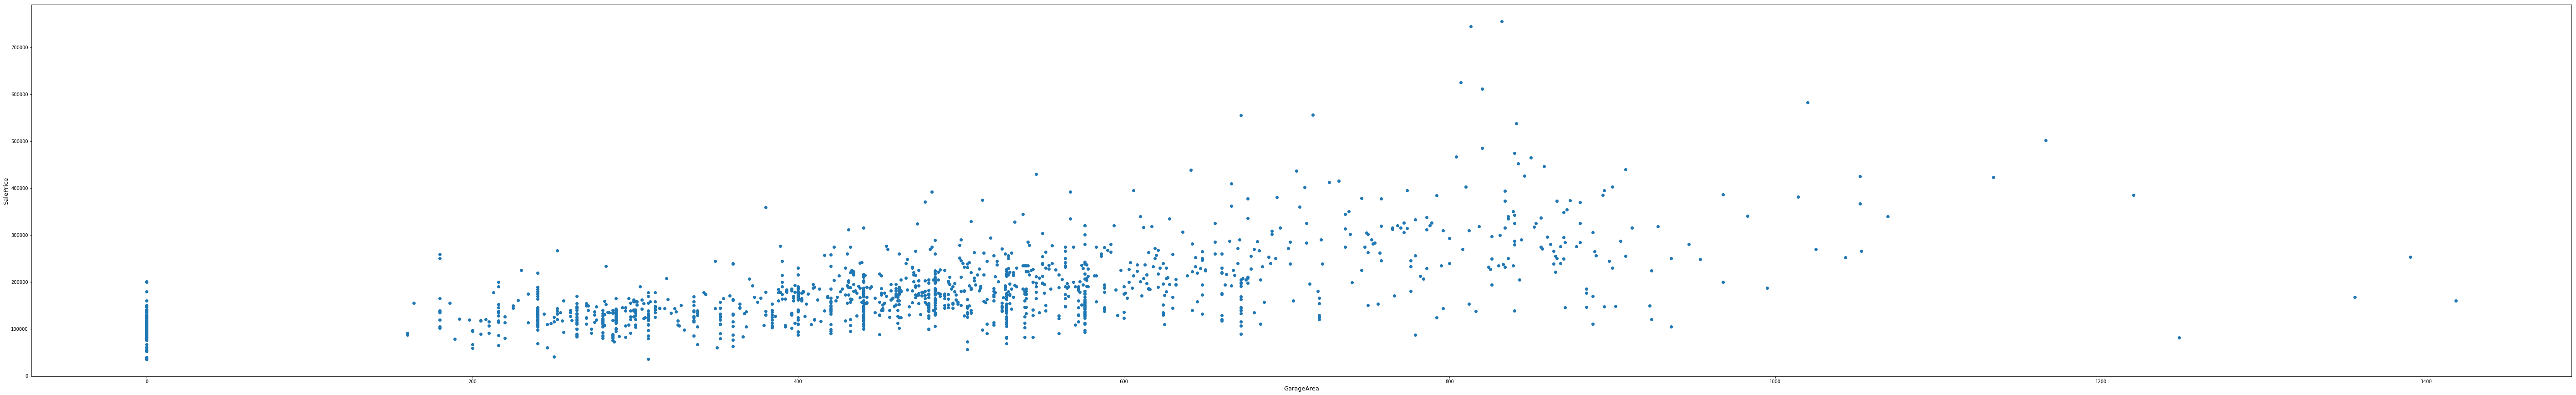

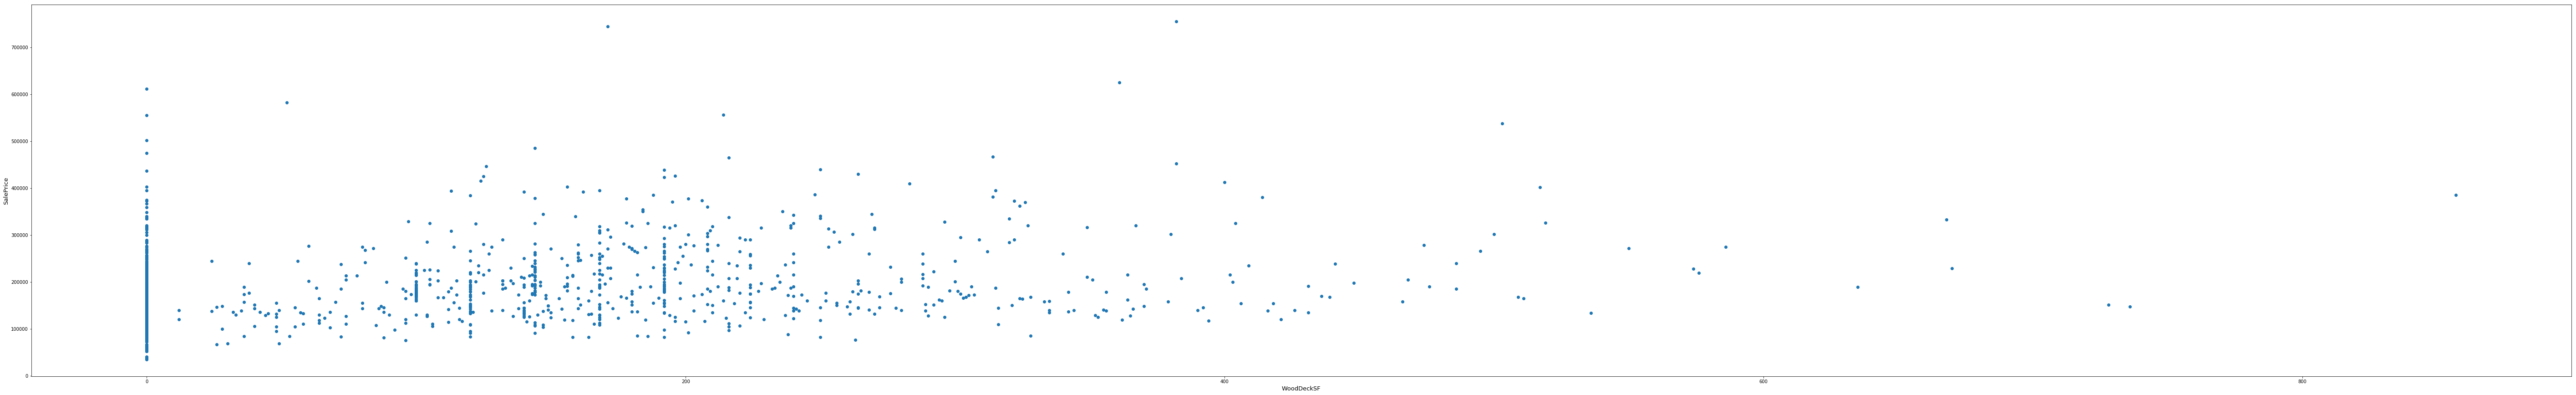

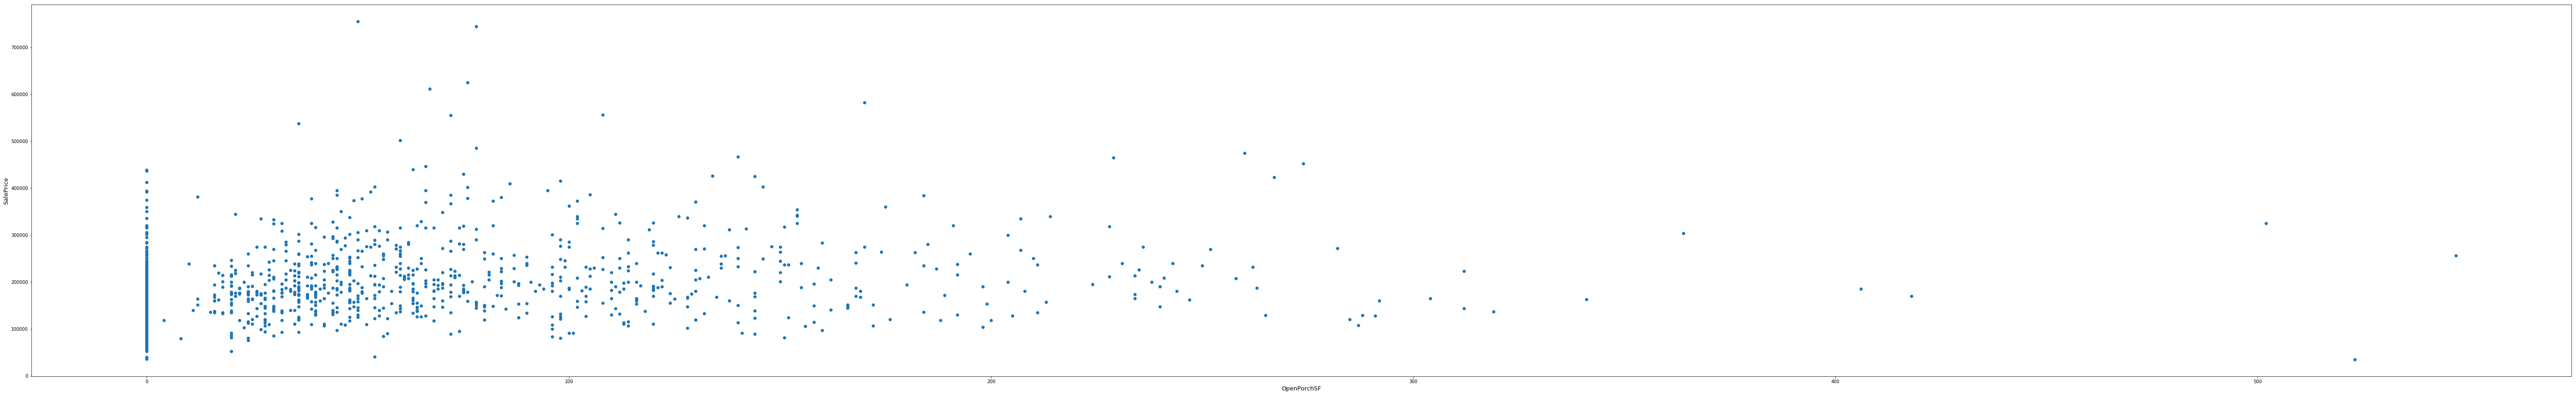

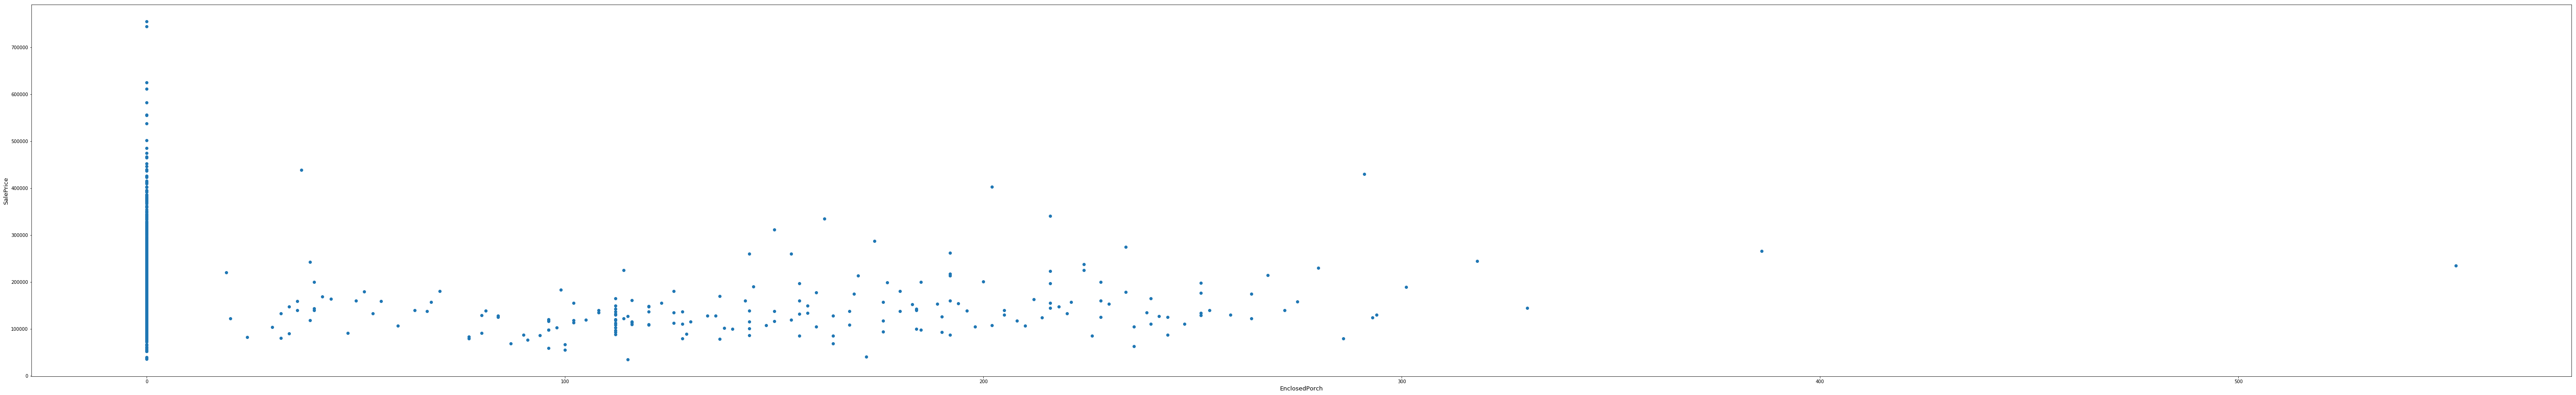

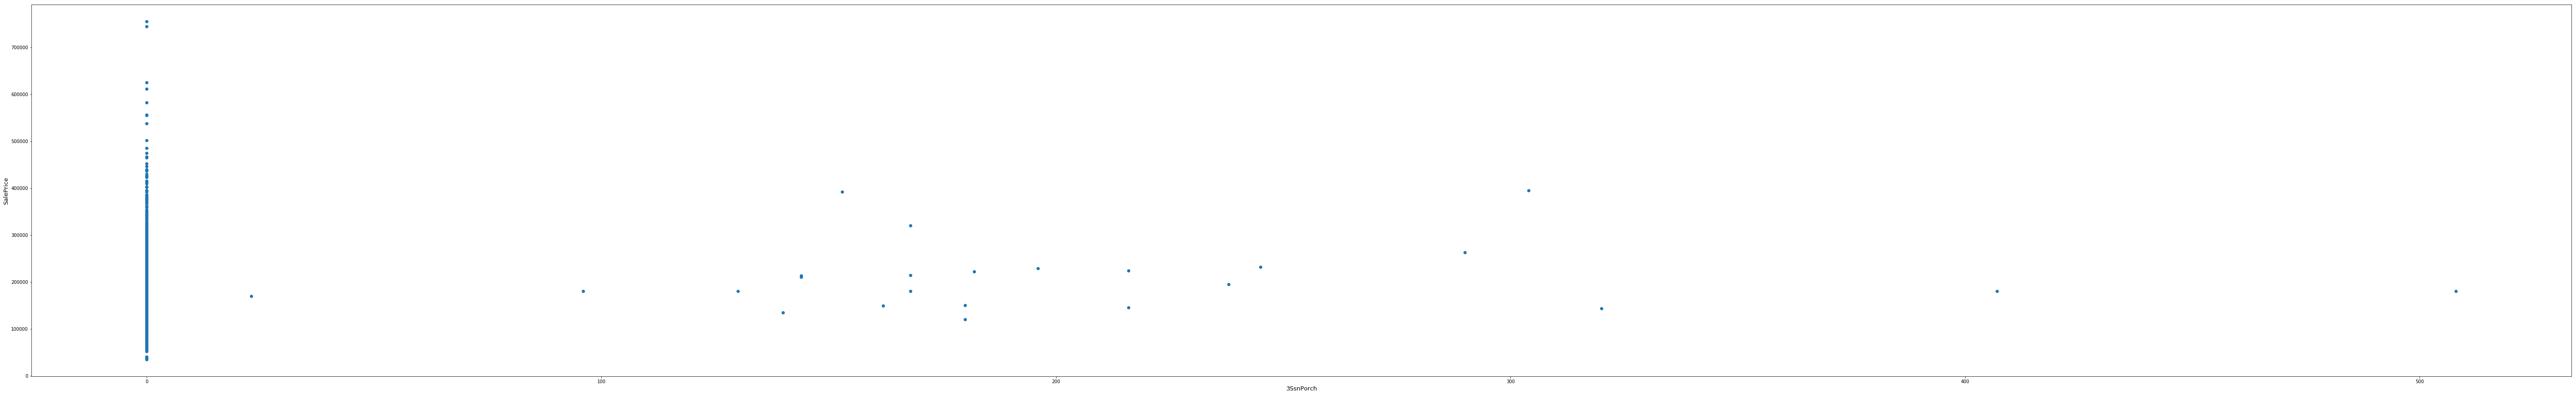

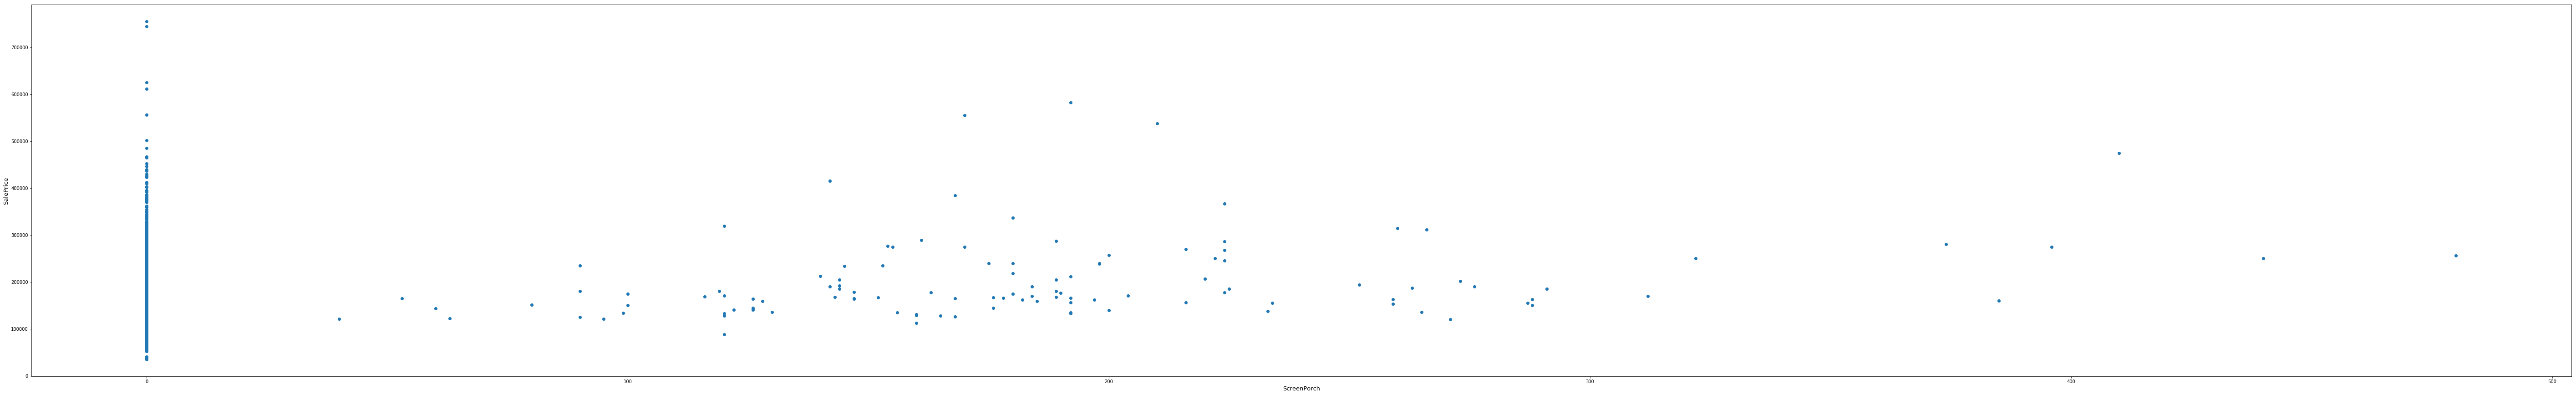

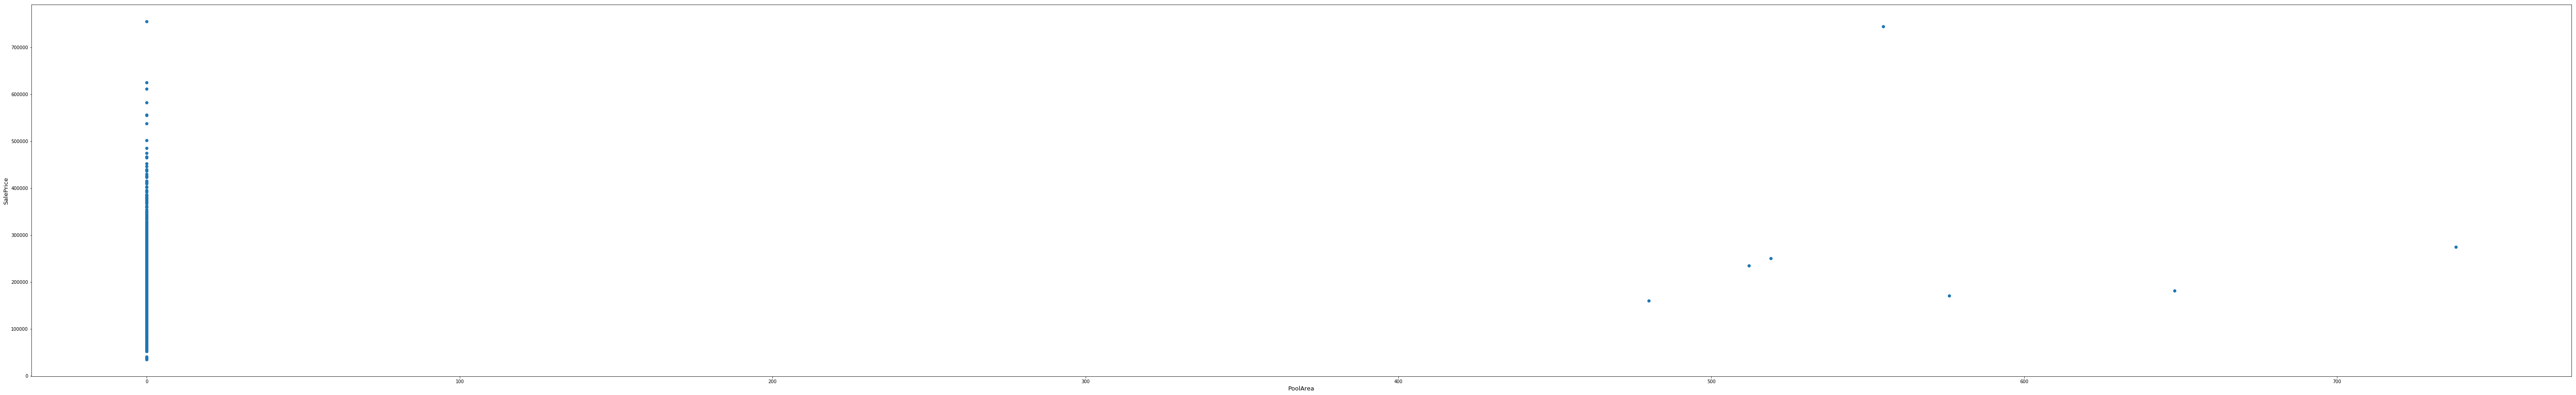

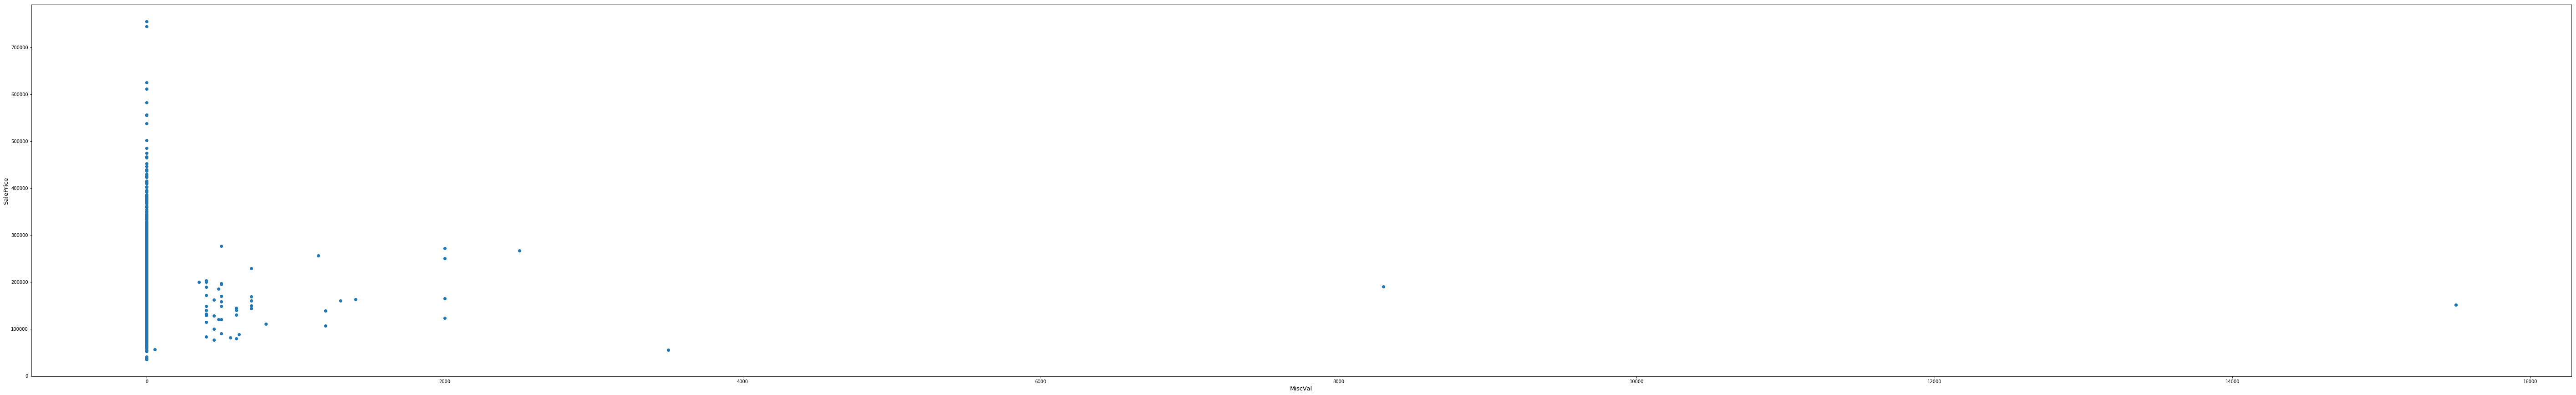

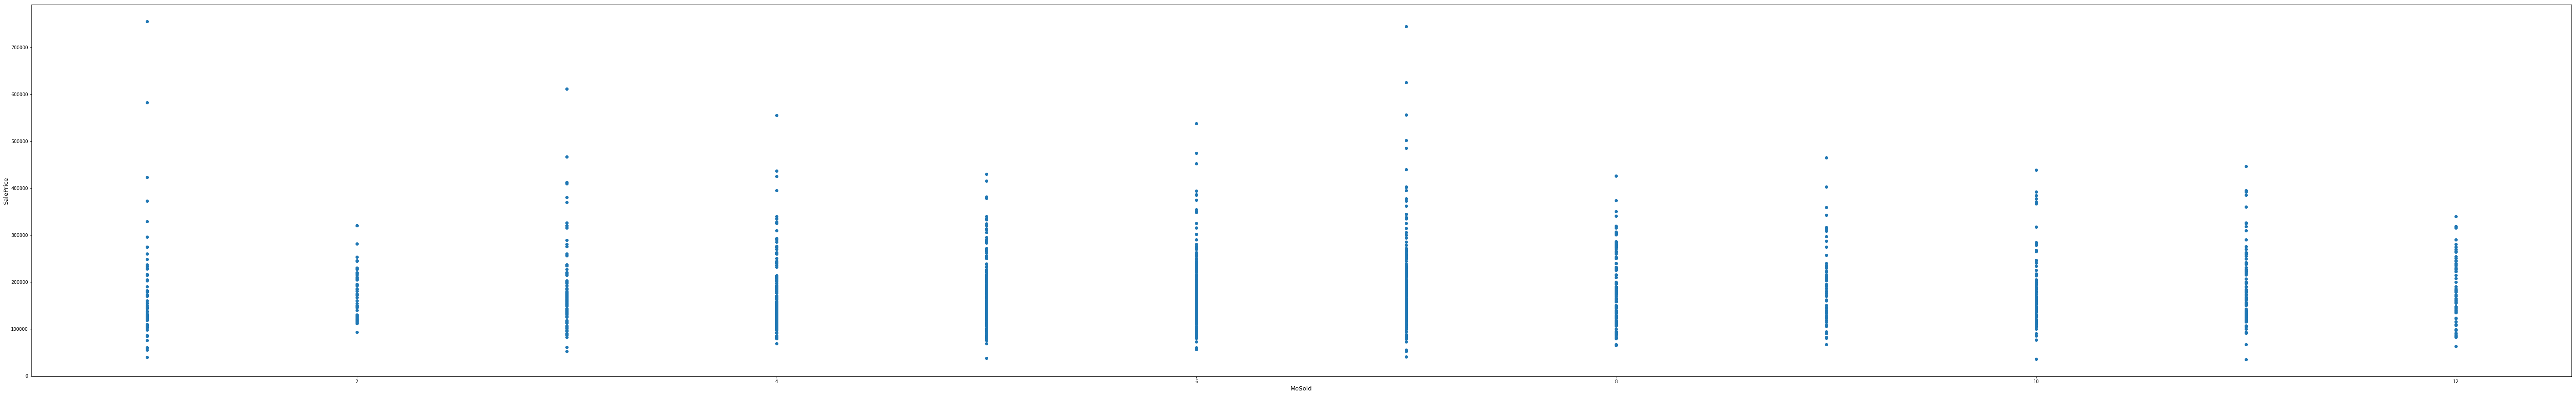

In [361]:
i=0
for i in range(len(cont_df.columns)-1):
    find_outliers(cont_df.iloc[:,i], cont_df.SalePrice)

In [362]:
cont_df.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.025606


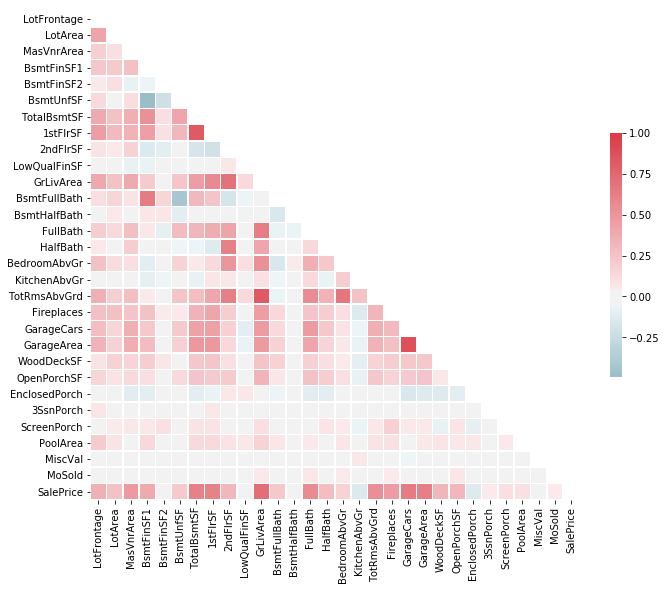

In [363]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

corr = cont_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Sale Price is strongly correlated with these continous variable, so we will eliminate outliers from these

### Predictor : Correlation with Price
------------------------------------------------

GrLivArea :    0.708624

GarageCars : 0.640409

GarageArea:   0.623431

TotalBsmtSF : 0.613581 

1stFlrSF  :  0.605852

TotRmsAbvGrd :   0.533723

FullBath  :  0.560664  



Following are the two outliers which might effect out prediction

In [364]:
train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Dropping the outliers brought in by variable GrLivArea

In [365]:
train_df = train_df.drop(train_df[(train_df.GrLivArea>4000) & (train_df.SalePrice<300000)].index)

train_df.shape

(1458, 80)

Checking the plots after dropping the outlier

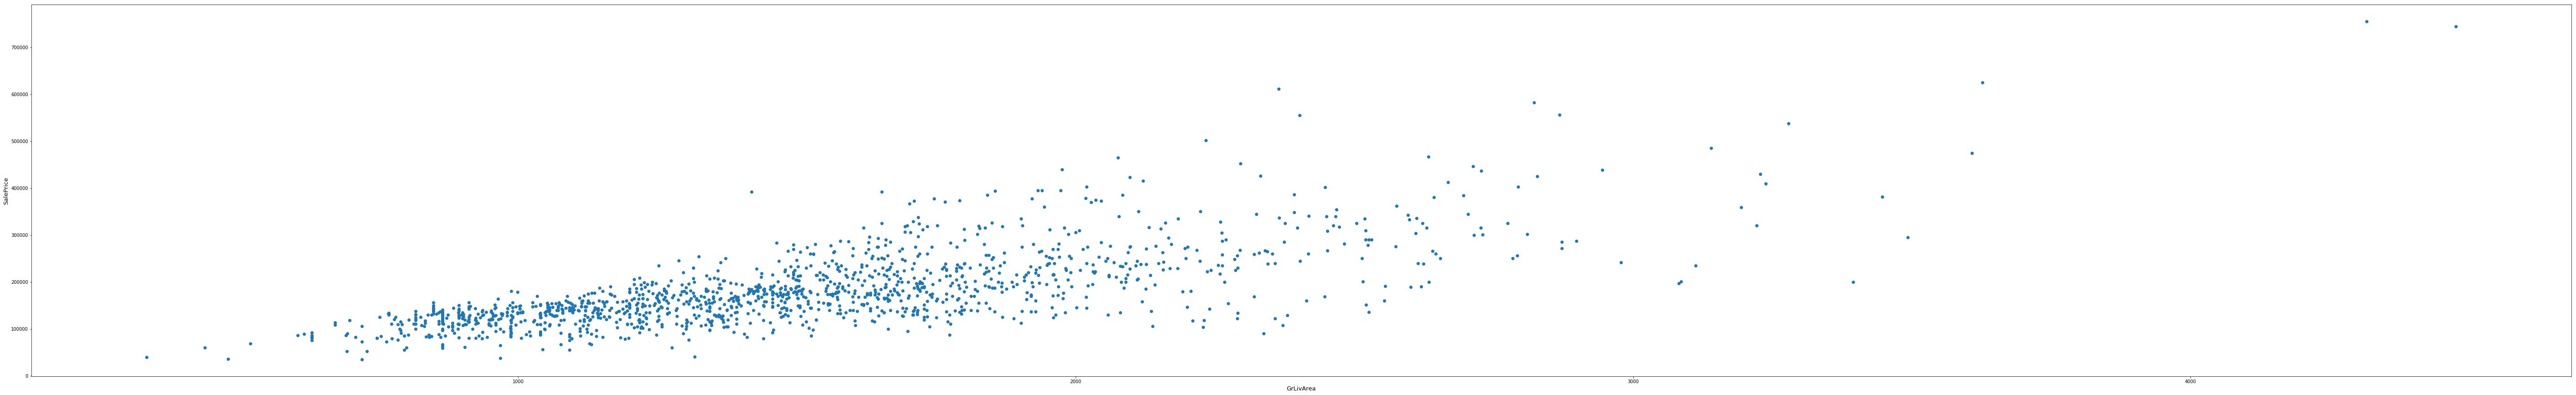

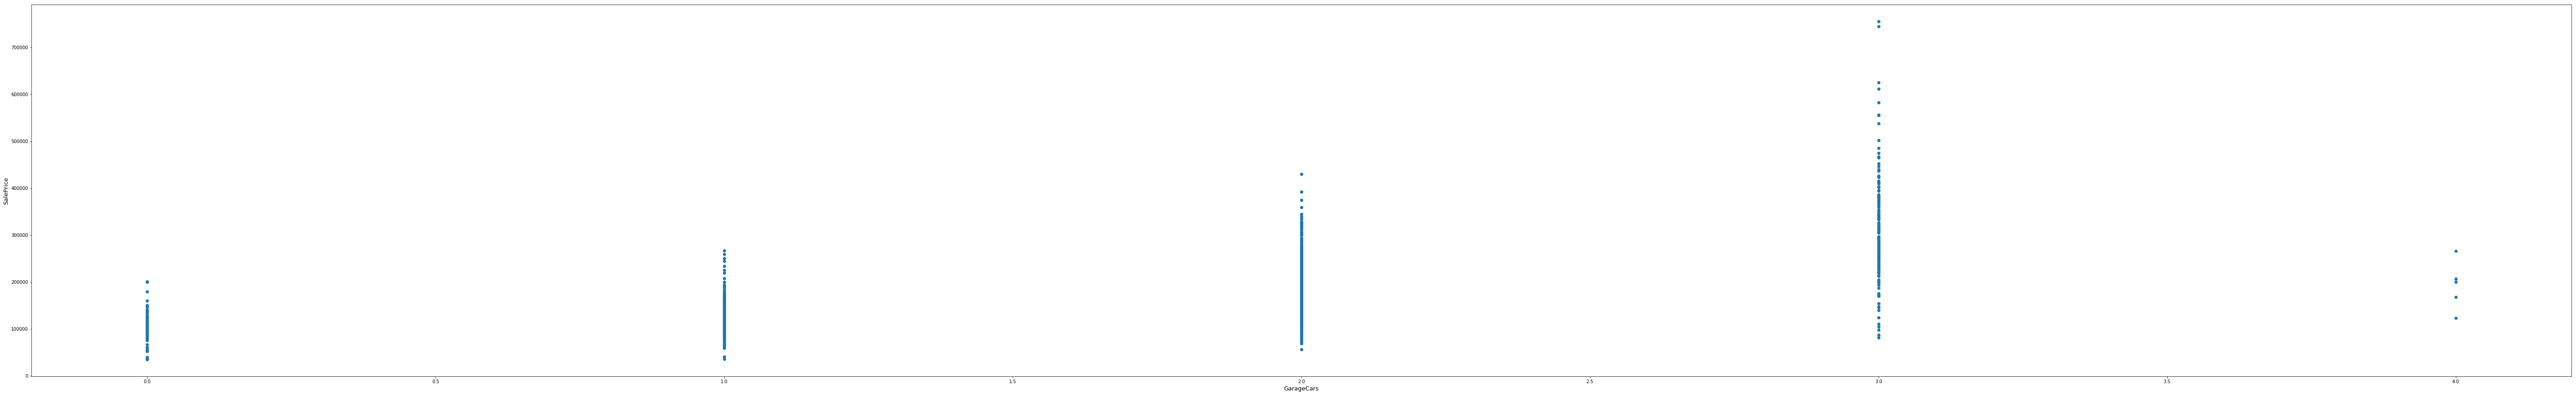

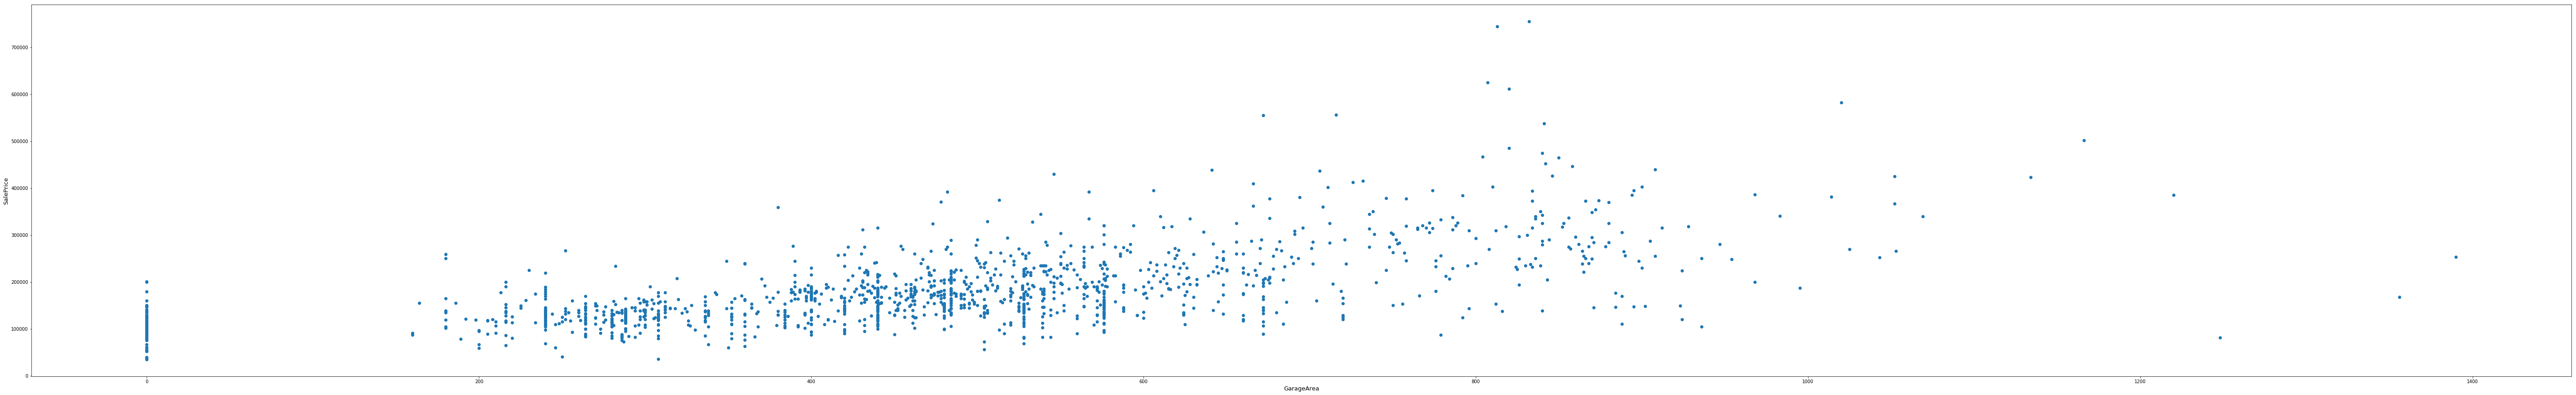

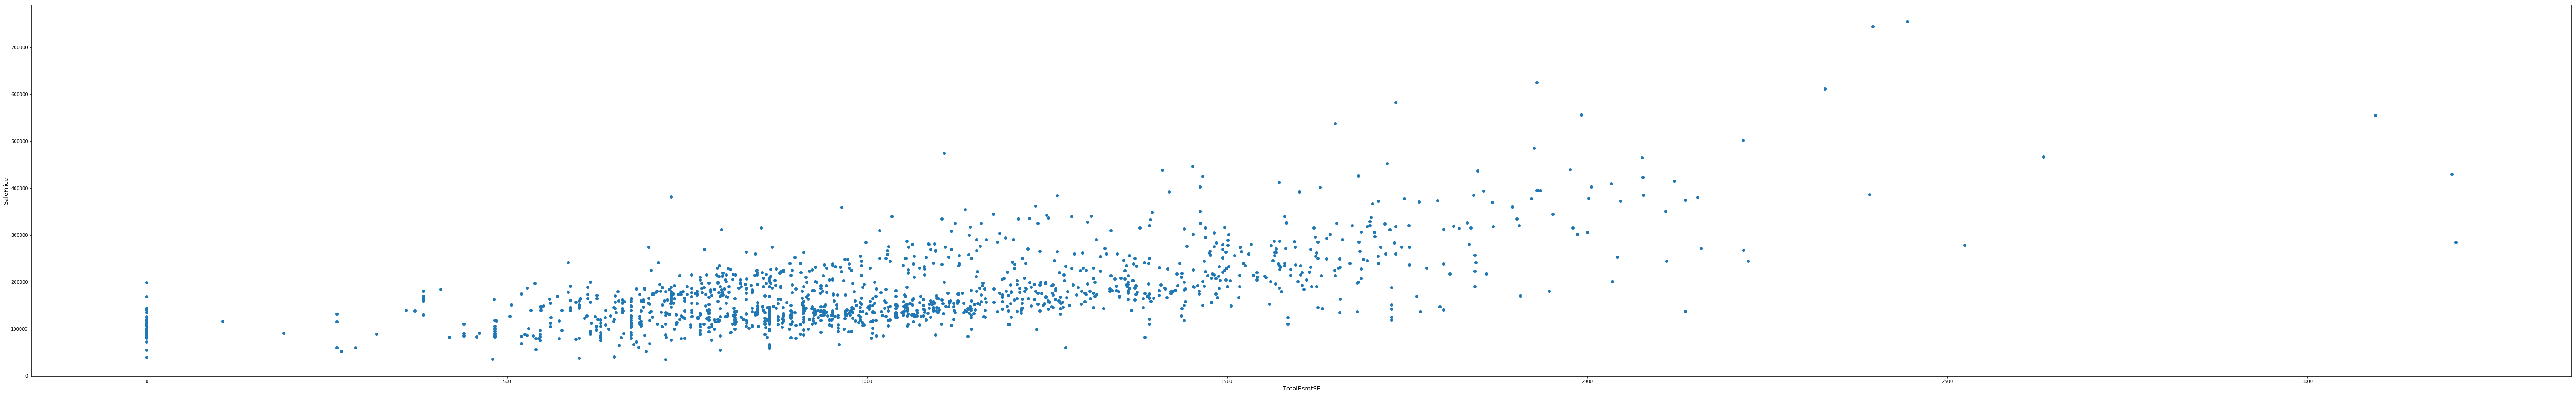

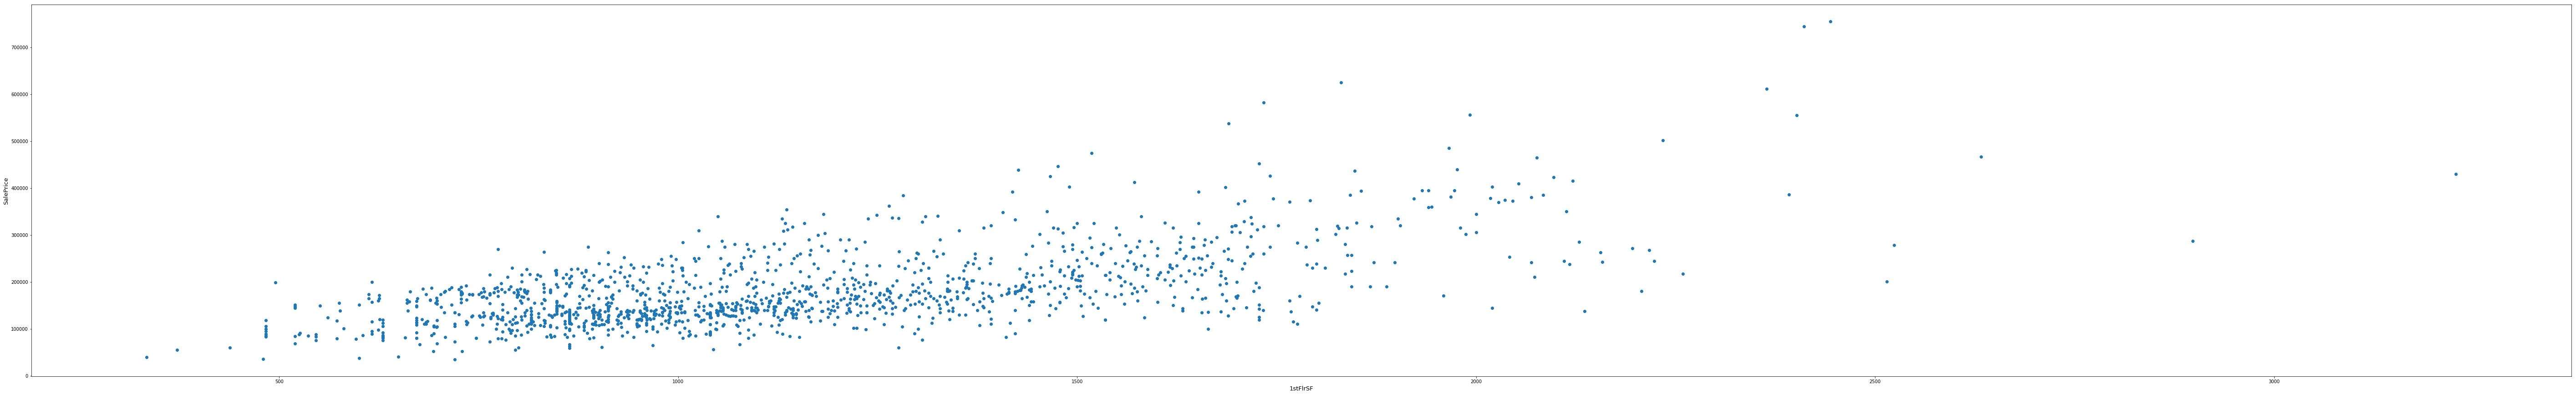

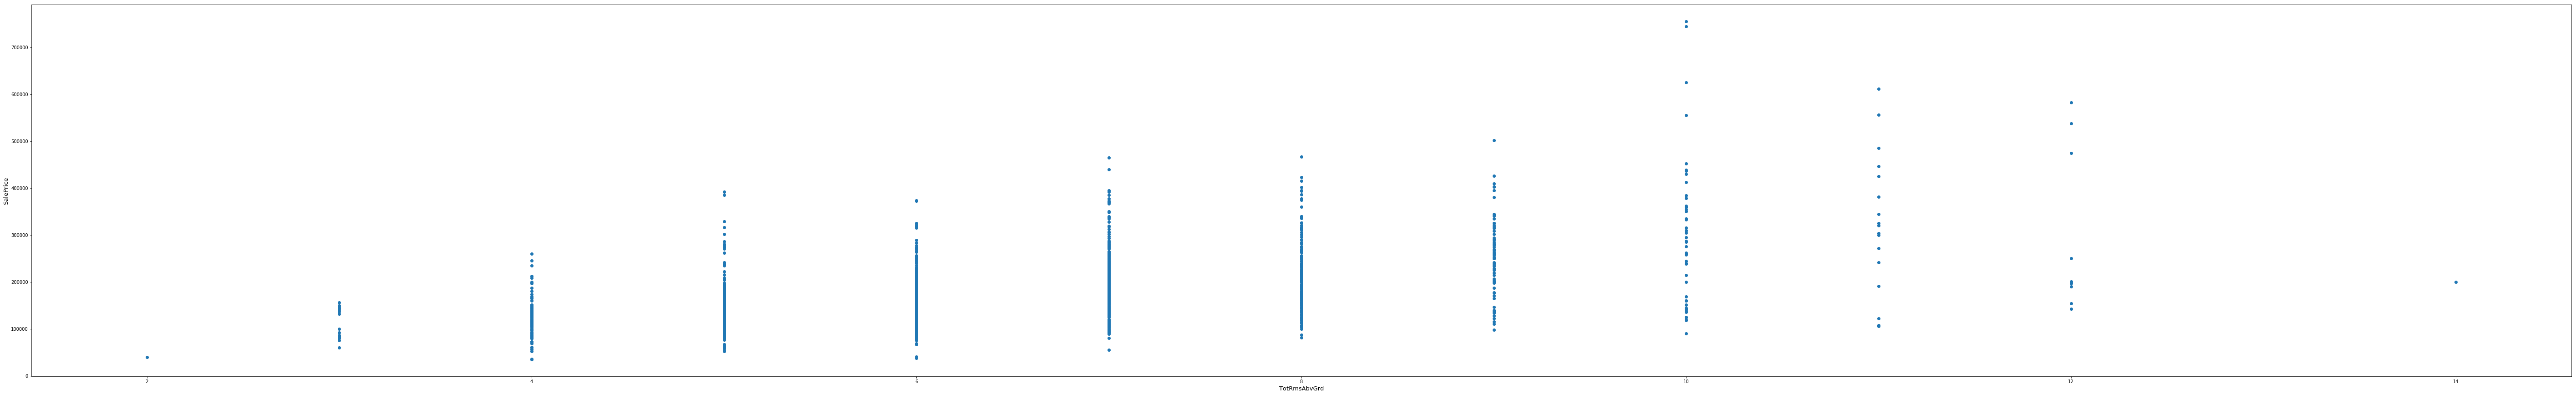

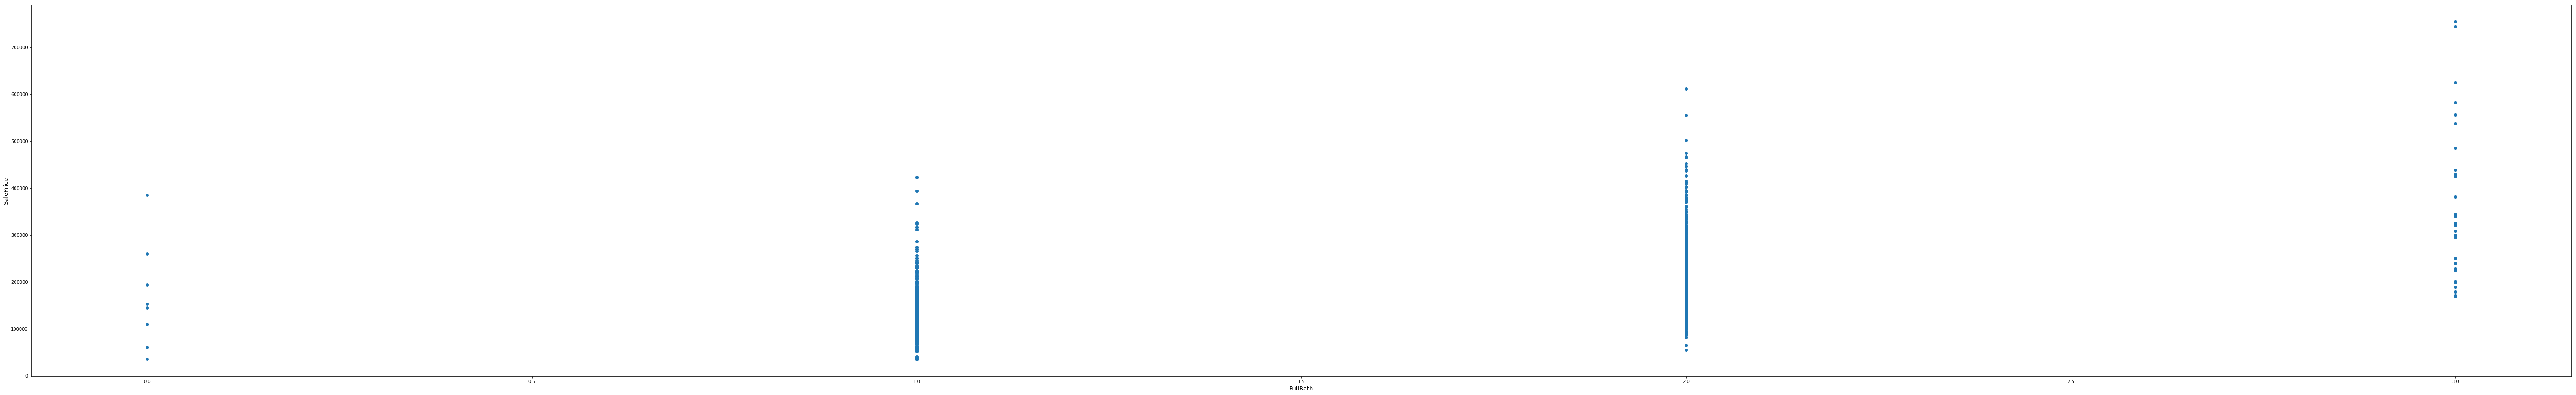

In [366]:
cont_df = train_df[[ 'LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                   'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                   'MoSold', 'SalePrice']]

find_outliers(cont_df.GrLivArea, cont_df.SalePrice)
find_outliers(cont_df.GarageCars, cont_df.SalePrice)
find_outliers(cont_df.GarageArea, cont_df.SalePrice)
find_outliers(cont_df.TotalBsmtSF, cont_df.SalePrice)
find_outliers(cont_df['1stFlrSF'], cont_df.SalePrice)
find_outliers(cont_df.TotRmsAbvGrd, cont_df.SalePrice)
find_outliers(cont_df.FullBath, cont_df.SalePrice)


Following observation shows outlier brought in by Garage Area, its detached garage where GrLivArea is only 894 , year built = 1935 for which such a low sale Price $81000 makes sense, so we are not dropping this outlier

In [367]:
train_df[(train_df.GarageArea>1200) & (train_df.SalePrice<100000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


### Analysis of Target variable

We want to predict SalePrice. Let's check the distribution of target variable


 mu = 180932.92 and sigma = 79467.79



C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Sale Price')

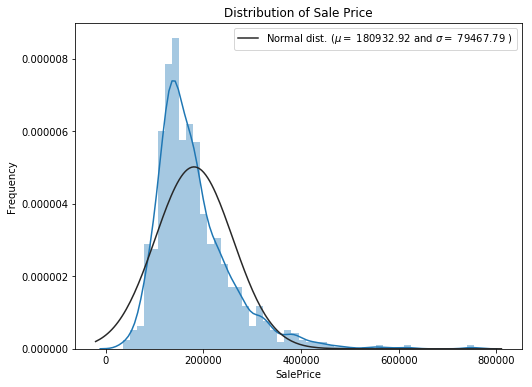

In [368]:
plt.figure(figsize = (8,6))

sns.distplot(train_df.SalePrice, bins=50, fit= stats.norm);

# Get the fitted parameters used by the function
(mean, sd) = stats.norm.fit(train_df.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

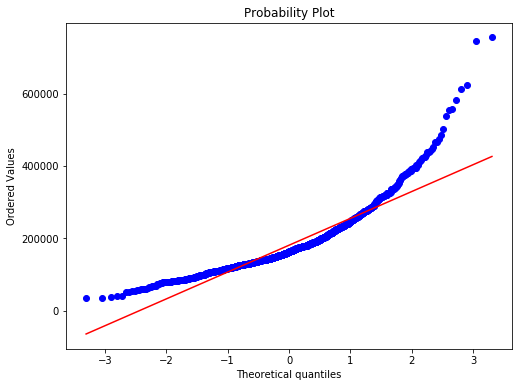

In [369]:
# Q Q plot
plt.figure(figsize = (8,6))
stats.probplot(train_df.SalePrice, plot=plt)
plt.show()

The Sale price follows normal distribution but has a right skew. As the Q Q plot shows, its following the law of linearity but needs improvement. Let's check what it looks like after transformation

### Transformation of target variable


 mu = 12.02 and sigma = 0.40



C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Sale Price')

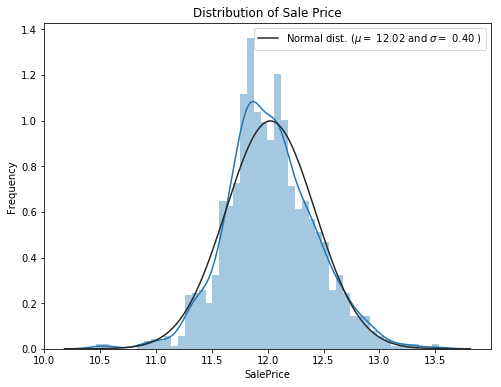

In [370]:
train_df.SalePrice = np.log(train_df.SalePrice)

plt.figure(figsize = (8,6))

sns.distplot(train_df.SalePrice, bins=50, fit= stats.norm);

# Get the fitted parameters used by the function
(mean, sd) = stats.norm.fit(train_df.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')



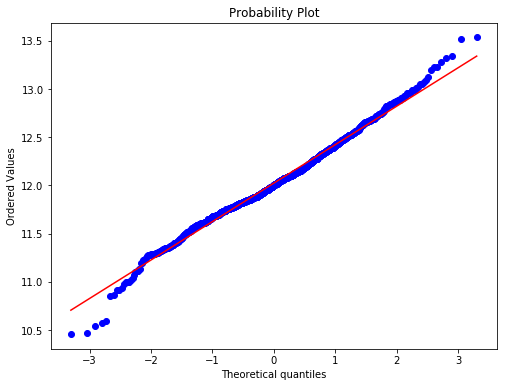

In [371]:

# Q Q plot
plt.figure(figsize = (8,6))
stats.probplot(train_df.SalePrice, plot=plt)
plt.show()

As the plots shows log transforming the price gives better results, we will transform it back after prediction using np.exp

### Check for skewness in predictors

In [275]:
def check_skew(feature):
    plt.figure(figsize = (8,6))

    sns.distplot(feature, bins=50, fit= stats.norm);

#     # Get the fitted parameters used by the function
#     (mean, sd) = stats.norm.fit(feature)
#     print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#     #Now plot the distribution
#     plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
#                 loc='best')
#     plt.ylabel('Frequency')
#     plt.title('Distribution of Sale Price')

In [28]:
i=0
for i in range(len(contDF.columns)-1):
    check_skew(contDF.iloc[:,i])

NameError: name 'contDF' is not defined

## Missing data imputation:

In [372]:
# Function impute_missing takes dataframe which needs to be imputed as input variable

def impute_missing(dfName):
    
 # impute GarageYrBlt with min GarageYrBlt for houses with no garage    
    dfName['GarageYrBlt'] = dfName['GarageYrBlt'].fillna(min(dfName['GarageYrBlt']))
    
 # impute MasVnrArea to 0 because for NAs we are imputing type to None   
    dfName['MasVnrArea'] = dfName['MasVnrArea'].fillna(0)
   
 #impute missing values by the median LotFrontage of the neighborhood.
    dfName['LotFrontage'] = dfName.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
 # for missing in Electrical variable, impute with type which occurs most frequently
    dfName['Electrical'] = dfName['Electrical'].fillna(dfName['Electrical'].mode()[0]) 
    
 # Check col names ad imputes None, 0 , or aggregated value based on algorithm       
    for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'MasVnrType'):
        dfName[col] = dfName[col].fillna('None')  

In [373]:
impute_missing(train_df)

In [374]:
# Missing value after imputation:
train_mask = train_df.isnull().sum()
train_mask[train_mask>0]

Series([], dtype: int64)

In [375]:
impute_missing(test_df)

In [376]:
test_mask = train_df.isnull().sum()
train_mask[train_mask>0]

Series([], dtype: int64)

## Feature Engineering:

#### Convert  variables to categorical:
- Has Second floor or not
- Is Basement completed?
- Has Basement1 or not
- Has Basement2 or not
- Has Basement or not
- Has Enclosed Porch or not
- Has OpenPorch
- Has Screen Porch
- Has 3SsnPorch
- Has WoodDeck
- Has Low quality finished
- Has pool
- Has MasVnr
- Has MiscVal
- Has Garage or not

In [377]:
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [378]:
inputcols = ['2ndFlrSF','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',\
            'LowQualFinSF', 'PoolArea', 'MasVnrArea', 'MiscVal']

In [379]:
outputcols = ['has2ndflr', 'hasbsmt1', 'hasbsmt2', 'isbsmtcomplete', 'hasbsmt', 'hasgarage', 'haswooddeck', 'hasopenporch',\
             'hasenclosedporch', 'has3ssnporch', 'hasscreenporch', 'islowqualfin', 'haspool', 'hasmasvnr', 'hasmiscval']

In [380]:
def add_categorical_col(df, inputcols, outputcols):
    if len(inputcols) != len(outputcols):
        raise "Col len does not equal"
    for index,inputcol in enumerate(inputcols):
        df[outputcols[index]] = df[inputcol].apply(lambda x: 0 if x == 0 else 1)

In [381]:
train_df1 = train_df.copy()
add_categorical_col(train_df1,inputcols,outputcols)

In [382]:
train_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has2ndflr,hasbsmt1,hasbsmt2,isbsmtcomplete,hasbsmt,hasgarage,haswooddeck,hasopenporch,hasenclosedporch,has3ssnporch,hasscreenporch,islowqualfin,haspool,hasmasvnr,hasmiscval
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429216,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0


In [383]:
train_df.shape

(1458, 80)

In [384]:
train_df1.shape

(1458, 95)

In [385]:
test_df1 = test_df.copy()
add_categorical_col(test_df1,inputcols,outputcols)

In [386]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


In [387]:
test_df.shape

(1459, 79)

In [388]:
test_df1.shape

(1459, 94)

### Detecting Multicollinearity Among Features:

In [389]:
df = pd.DataFrame()
for col in numeric_cols:
    df[col] = train_df[col].apply(lambda x: float(x))

Text(0.5,1,'$R^2$ of a continuous feature against the other features')

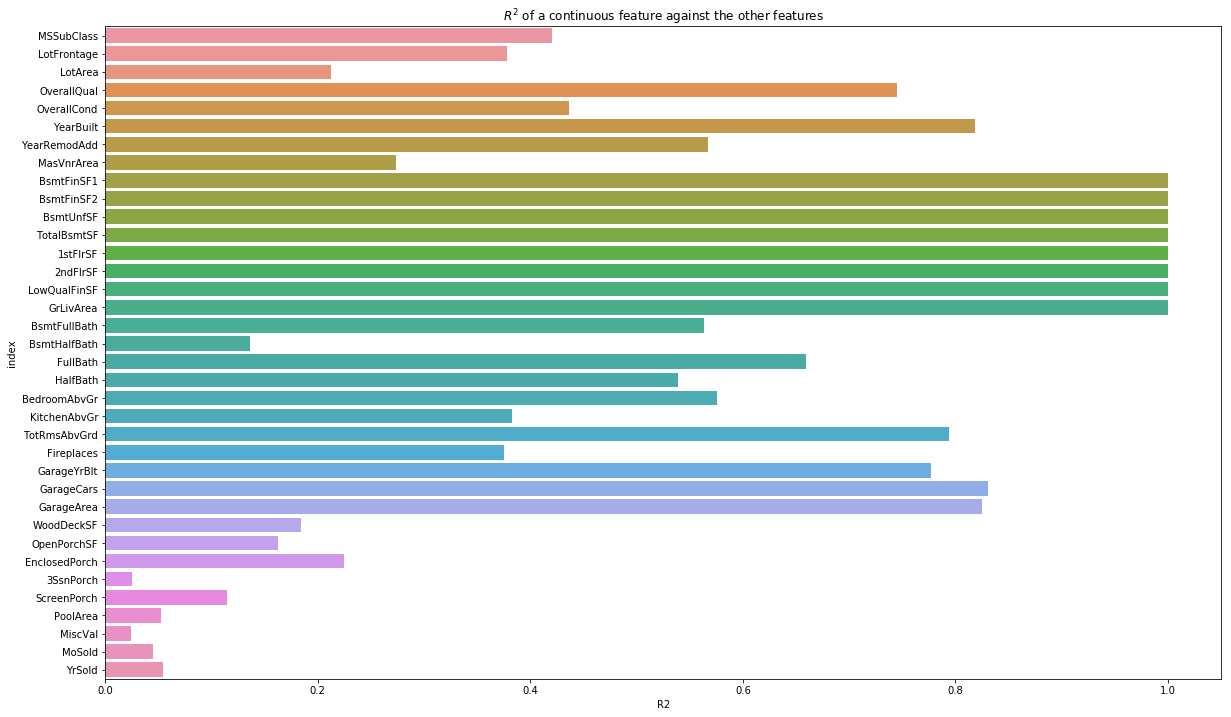

In [390]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


ols = LinearRegression()
scores = {}

for col in numeric_cols[:-1]:
    df2 = df.copy()
    feature = df2[col].copy()
    df2.drop(col,axis=1, inplace=True)
    ols.fit(df2, feature)
    scores[col] = ols.score(df2, feature)

plt.figure(figsize=(20, 12))
sns.barplot(y = 'index', x='R2', data = pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

## Get dummy

In [402]:
ctrain = train_df1.copy()
ctest = test_df1.copy()

In [403]:
# get categorical variable
cat_variables = set(ctrain.columns) - set(cont_col) - {'SalePrice'} - {'GarageYrBlt'} - {'YrSold'} - {'YearBuilt'} - {'YearRemodAdd'}

#define get dummy function for all dummy variables
def get_dummy(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col, dummy_na=False)
        df = df.drop(col, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

dtrain = get_dummy(ctrain, cat_variables)
dtest = get_dummy(ctest, cat_variables)

# dtrain = ctrain.copy().drop(columns = cat_variables)
# dtest = ctest.copy().drop(columns = cat_variables)

# dtrain = pd.concat([dtrain, dummy_train], axis=1)
# dtest = pd.concat([dtest, dummy_test], axis=1)


In [404]:
dtrain.shape

(1458, 363)

In [405]:
dtest.shape

(1459, 346)

### Statsmodels analysis:

In [121]:
for each in dtest.columns:
    if each not in dtrain.columns:
        print(each)

RoofMatl_ClyTile


In [122]:
dtest.drop('RoofMatl_ClyTile',axis = 1, inplace = True)

In [123]:
dtest.shape

(1460, 333)

In [125]:
import statsmodels.api as sm
X_add_const = sm.add_constant(dtrain.loc[:, dtrain.columns != 'SalePrice'])
ols = sm.OLS(dtrain['SalePrice'], X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     84.87
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        18:28:19   Log-Likelihood:                 1482.3
No. Observations:                1458   AIC:                            -2411.
Df Residuals:                    1181   BIC:                            -946.8
Df Model:                         276                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.03

In [126]:
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05]  # those coefficients with 0 lying outside their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,1.037600,4.450000e-01,2.331,0.020,0.164000,1.911000
1,LotFrontage,0.000400,0.000000e+00,2.013,0.044,0.000010,0.001000
2,LotArea,0.000003,4.820000e-07,6.424,0.000,0.000002,0.000004
3,YearBuilt,0.001900,0.000000e+00,5.137,0.000,0.001000,0.003000
4,YearRemodAdd,0.000900,0.000000e+00,3.620,0.000,0.000000,0.001000
6,BsmtFinSF1,0.000059,1.260000e-05,4.650,0.000,0.000034,0.000084
9,TotalBsmtSF,0.000100,1.790000e-05,5.787,0.000,0.000068,0.000000
10,1stFlrSF,0.000079,2.840000e-05,2.789,0.005,0.000023,0.000000
11,2ndFlrSF,0.000089,2.410000e-05,3.685,0.000,0.000042,0.000000
13,GrLivArea,0.000200,2.530000e-05,6.555,0.000,0.000000,0.000000


In [127]:
table[table['p value']>=0.05] # those coefficients with 0 lying in their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
5,MasVnrArea,1.119000e-05,0.000025,0.444,0.657,-0.000038,0.000061
7,BsmtFinSF2,4.533000e-05,0.000026,1.751,0.080,-0.000005,0.000096
8,BsmtUnfSF,-5.565000e-07,0.000012,-0.046,0.963,-0.000024,0.000023
12,LowQualFinSF,-2.174000e-06,0.000062,-0.035,0.972,-0.000000,0.000000
15,BsmtHalfBath,7.200000e-03,0.013000,0.543,0.587,-0.019000,0.033000
18,BedroomAbvGr,9.000000e-04,0.006000,0.147,0.883,-0.011000,0.013000
20,TotRmsAbvGrd,4.462000e-05,0.004000,0.011,0.991,-0.008000,0.008000
21,Fireplaces,9.500000e-03,0.011000,0.851,0.395,-0.012000,0.031000
22,GarageYrBlt,-8.021000e-05,0.000000,-0.300,0.764,-0.001000,0.000000
26,OpenPorchSF,8.617000e-05,0.000051,1.694,0.091,-0.000014,0.000000


### Normalization of the Features:

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

In [129]:
scaleType = 'standard'
if scaleType not in ['standard', 'minmax', 'maxabs']: 
           raise ValueError('%s is not a valid choice' %(scaleType))
if scaleType == 'standard':
      scaler = StandardScaler()
elif scaleType == 'minmax':
      scaler = MinMaxScaler()
elif scaleType == 'maxabs':
      scaler = MaxAbsScaler()

# Fix the scale model using the train set
scaler.fit(dtrain)
X_train_scaled = scaler.transform(dtrain)
X_test_scaled  = scaler.transform(dtest)

In [131]:
X_add_const = sm.add_constant(X_train_scaled)
ols = sm.OLS(dtrain['SalePrice'], X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.075e+27
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        18:29:27   Log-Likelihood:                 44353.
No. Observations:                1458   AIC:                        -8.815e+04
Df Residuals:                    1180   BIC:                        -8.668e+04
Df Model:                         277                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0240   4.33e-16   2.78e+16      0.0

In [132]:
ans.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,12.0240,4.33e-16,2.78e+16,0.000,12.024,12.024
x1,-5.551e-16,7.17e-16,-0.774,0.439,-1.96e-15,8.52e-16
x2,-5.551e-17,8.21e-16,-0.068,0.946,-1.67e-15,1.56e-15
x3,-1.61e-15,1.9e-15,-0.846,0.398,-5.34e-15,2.12e-15
x4,0,8.72e-16,0,1.000,-1.71e-15,1.71e-15
x5,-4.996e-16,7.67e-16,-0.651,0.515,-2.01e-15,1.01e-15
x6,-3.331e-16,7.68e-16,-0.434,0.664,-1.84e-15,1.17e-15
x7,9.992e-16,9.03e-16,1.106,0.269,-7.73e-16,2.77e-15
x8,-6.523e-16,6.56e-16,-0.994,0.321,-1.94e-15,6.35e-16
x9,7.772e-16,1.08e-15,0.717,0.473,-1.35e-15,2.9e-15


In [162]:
plt.rcParams['figure.figsize'] = (100,15)
y_min, y_max = -0.00000000000001,0.00000000000001

table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float, '2.5% confidence':float, '97.5% confidence':float})
slope_table = table[['name', 'coef', '2.5% confidence', '97.5% confidence']].iloc[1:]
slope_table.name = dtrain.columns

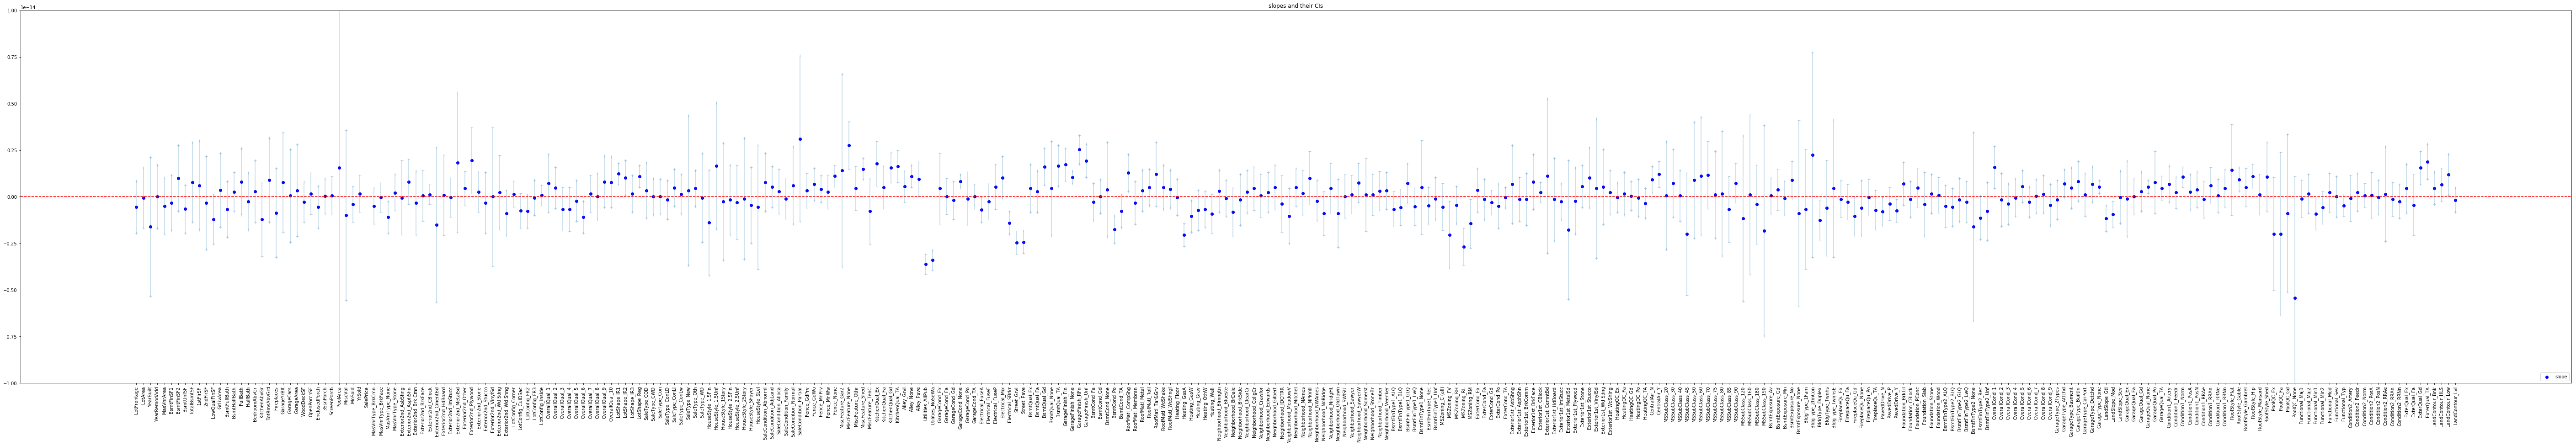

In [163]:
slope_table['y_min'] = slope_table['2.5% confidence'].map(lambda t:(t-y_min)/(y_max-y_min))
slope_table['y_max'] = slope_table['97.5% confidence'].map(lambda t:(t-y_min)/(y_max-y_min))
x = range(1,334)
plt.scatter(x, slope_table['coef'], label='slope', c='b')
plt.axhline(0,linestyle='--', c='r')

for i in x:
    plt.axvline(i, ymin=slope_table['y_min'][i], ymax=slope_table['y_max'][i], marker='+', alpha=0.3)
plt.xticks(x,slope_table.name,rotation='vertical')
plt.ylim((y_min, y_max))
plt.title('slopes and their CIs')
plt.legend(loc=4)

### Regularization:

### Ridge:

In [166]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [167]:
ridge = Ridge()

In [169]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [173]:
dtrain_nt = dtrain.loc[:, dtrain.columns != 'SalePrice']

In [174]:
ridge.fit(dtrain_nt,dtrain['SalePrice'])
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=dtrain_nt.columns)

the ridge intercept is: 10.83


LotFrontage              0.000415
LotArea                  0.000003
YearBuilt                0.001840
YearRemodAdd             0.000854
MasVnrArea               0.000009
BsmtFinSF1               0.000053
BsmtFinSF2               0.000046
BsmtUnfSF               -0.000005
TotalBsmtSF              0.000095
1stFlrSF                 0.000083
2ndFlrSF                 0.000076
LowQualFinSF             0.000015
GrLivArea                0.000175
BsmtFullBath             0.022032
BsmtHalfBath             0.004863
FullBath                 0.025319
HalfBath                 0.026861
BedroomAbvGr             0.001132
KitchenAbvGr            -0.054831
TotRmsAbvGrd             0.000706
Fireplaces               0.009996
GarageYrBlt             -0.000062
GarageCars               0.025934
GarageArea               0.000076
WoodDeckSF               0.000091
OpenPorchSF              0.000108
EnclosedPorch            0.000112
3SsnPorch                0.000145
ScreenPorch              0.000267
PoolArea      

### Normalized:

In [176]:
ridge.set_params(alpha = 0, normalize=True)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [177]:
ridge.fit(dtrain_nt,dtrain['SalePrice'])

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [178]:
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=dtrain_nt.columns)

the ridge intercept is: -4770637245497.44


LotFrontage              4.415948e-04
LotArea                  3.026450e-06
YearBuilt                1.901499e-03
YearRemodAdd             8.785813e-04
MasVnrArea               1.254245e-05
BsmtFinSF1              -2.177973e+08
BsmtFinSF2              -2.177973e+08
BsmtUnfSF               -2.177973e+08
TotalBsmtSF              2.177973e+08
1stFlrSF                 8.275569e+07
2ndFlrSF                 8.275569e+07
LowQualFinSF             8.275569e+07
GrLivArea               -8.275569e+07
BsmtFullBath             2.224603e-02
BsmtHalfBath             7.288728e-03
FullBath                 2.675498e-02
HalfBath                 2.647847e-02
BedroomAbvGr             7.240458e-04
KitchenAbvGr            -6.083559e-02
TotRmsAbvGrd            -2.519981e-05
Fireplaces               8.647014e-03
GarageYrBlt             -7.437163e-05
GarageCars               2.301644e-02
GarageArea               8.421387e-05
WoodDeckSF               8.989949e-05
OpenPorchSF              8.739639e-05
EnclosedPorc

In [179]:
linear = LinearRegression()
linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
linear.set_params(normalize=True)
linear.fit(dtrain_nt, dtrain['SalePrice'])
print('the MLR intercept is: %.2f' %(linear.intercept_))
pd.Series(linear.coef_, index=dtrain_nt.columns)

the MLR intercept is: -9980845172215.20


LotFrontage              4.009572e-04
LotArea                  3.072414e-06
YearBuilt                1.868299e-03
YearRemodAdd             8.794210e-04
MasVnrArea               1.142858e-05
BsmtFinSF1              -1.132057e+09
BsmtFinSF2              -1.132057e+09
BsmtUnfSF               -1.132057e+09
TotalBsmtSF              1.132057e+09
1stFlrSF                -1.059211e+08
2ndFlrSF                -1.059211e+08
LowQualFinSF            -1.059211e+08
GrLivArea                1.059211e+08
BsmtFullBath             2.172058e-02
BsmtHalfBath             6.867029e-03
FullBath                 2.624054e-02
HalfBath                 2.711291e-02
BedroomAbvGr             6.483603e-04
KitchenAbvGr            -6.019411e-02
TotRmsAbvGrd             6.333172e-05
Fireplaces               8.707530e-03
GarageYrBlt             -7.169017e-05
GarageCars               2.386832e-02
GarageArea               8.251217e-05
WoodDeckSF               8.832486e-05
OpenPorchSF              8.461061e-05
EnclosedPorc

### Cross-Validation: